# CHAID 모델링

##라이브러리 불러오기 및 데이터 불러오기

In [ ]:
pip install CHAID

  Preparing metadata (setup.py) ... done
  Created wheel for CHAID: filename=CHAID-5.4.1-py3-none-any.whl size=21040 sha256=b7b9cd9c768e6b30f73947b6bbb2f80a3707695f3e984f4a279ddf059188091d
  Stored in directory: /root/.cache/pip/wheels/78/df/52/1f6c80d536b519d61adf997c620d6bceb67edaa24148b3a350
Successfully built CHAID


In [ ]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [61]:
#시각화 글꼴 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,652 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [1]:
import matplotlib.pyplot as plt #실행 전 런타임 다시 시작

plt.rc('font', family='NanumGothic')

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from CHAID import Tree, NominalColumn

In [2]:
import pandas as pd
import numpy as np

In [6]:
#쇠퇴지수 등급 아닌 수치 및 비율로 들어간 데이터
num_df = pd.read_csv("/content/drive/Othercomputers/내 노트북/DNA/DNA/영천시 공모전/final_dataframe/수치df.csv")

In [10]:
final_df = pd.read_excel("/content/drive/Othercomputers/내 노트북/DNA/DNA/영천시 공모전/final_dataframe/최종데이터프레임.xlsx")

In [14]:
num_df.rename(columns={'의료종사자수.1':'의료종사자수'}, inplace=True)

## 해줘야 할 것
- 정규성 검정(소표본이기 때문에 정규성 검정이 필요해보임)
- 변수 선택(정규성 검정에서 제외하거나 integer로 되어있는 경우에는 nominal로 넣어주는 형식으로 진행)
- 변수 나눠준 후 의사결정나무 돌리기 -> 총 4개
- 의사결정나무 해석

###변수선택

In [ ]:
final_df.columns

Index(['읍면동', '공공도서관수', '유치원수', '유치원학급수', '어린이집수', '초등학교수', '사설학원수', '중학교수',
       '15세미만', '15세이상65세미만', '65세이상', '세대수', '인구밀도', '한국인수', '외국인수', '전입 계',
       '전출 계', '전년도대비세대수증감', '전년도대비인구수증감', '저소득가구수', '저소득가구원수', '한부모가족지원수급가구',
       '한부모가족지원수급가구원수', '국민기초생활보장법수급가구', '국민기초생활보장법수급가구원수',
       '인구변화율(주민등록인구통계)등급', '노령화지수(주민등록인구통계)등급', '고령인구수(주민등록인구통계)등급',
       '노년부양비(주민등록인구통계)등급', '노인여가복지시설 수', '주유소수', '장애인등록현황수', '사업체당종사자수등급',
       '제조업종사자비율등급', '도소매업종사자수(천명당)등급', '소형주택비율등급', '노후주택비율등급', '신규주택비율등급',
       '총사업체수증감율등급', '총종사자수증감율등급', '고차산업종사자비율등급', '주요산업별종사자수등급', '총사업체수등급',
       '부동산공시지가등급', '접도율등급', '노후건축물비율등급', '도소매업체증감율등급', '제조업체증감율등급',
       '경제활동인구(주민등록인구통계)등급', '응급의료기관수', '의료종사자수', '병원수', '병상수', '공장 수',
       '노후건축물비율', '노인주거복지시설수', '도시공원수', '음식점수', '업소수', '캠핑장 수 ', '금융기관수',
       '문화공간수', '행사수(2015_2020)', '과거대비산업체변화', '개선된소멸위험지수', '개선된소멸위험지수등급'],
      dtype='object')

In [ ]:
#상관관계 확인
#0.3 이하인 것만 저장
cols=['공공도서관수', '유치원수', '유치원학급수', '어린이집수', '초등학교수', '사설학원수', '중학교수',
       '15세미만', '15세이상65세미만', '65세이상', '세대수', '인구밀도', '한국인수', '외국인수', '전입 계',
       '전출 계', '전년도대비세대수증감', '전년도대비인구수증감', '저소득가구수', '저소득가구원수', '한부모가족지원수급가구',
       '한부모가족지원수급가구원수', '국민기초생활보장법수급가구', '국민기초생활보장법수급가구원수',
       '인구변화율(주민등록인구통계)등급', '노령화지수(주민등록인구통계)등급', '고령인구수(주민등록인구통계)등급',
       '노년부양비(주민등록인구통계)등급', '노인여가복지시설 수', '주유소수', '장애인등록현황수', '사업체당종사자수등급',
       '제조업종사자비율등급', '도소매업종사자수(천명당)등급', '소형주택비율등급', '노후주택비율등급', '신규주택비율등급',
       '총사업체수증감율등급', '총종사자수증감율등급', '고차산업종사자비율등급', '주요산업별종사자수등급', '총사업체수등급',
       '부동산공시지가등급', '접도율등급', '노후건축물비율등급', '도소매업체증감율등급', '제조업체증감율등급',
       '경제활동인구(주민등록인구통계)등급', '응급의료기관수', '의료종사자수', '병원수', '병상수', '공장 수',
       '노후건축물비율', '노인주거복지시설수', '도시공원수', '음식점수', '업소수', '캠핑장 수 ', '금융기관수',
       '문화공간수', '행사수(2015_2020)', '과거대비산업체변화']
ls=[]
for i in cols:
  corr=np.corrcoef(final_df[i], final_df['개선된소멸위험지수'])[0,1]
  print(i,"와 개선된 소멸위험지수의 상관계수",corr)
  if abs(corr) < 0.4:
    ls.append(i)

공공도서관수 와 개선된 소멸위험지수의 상관계수 0.06390992088839943
유치원수 와 개선된 소멸위험지수의 상관계수 -0.2133984385983115
유치원학급수 와 개선된 소멸위험지수의 상관계수 0.0639646302464609
어린이집수 와 개선된 소멸위험지수의 상관계수 0.3935224197125341
초등학교수 와 개선된 소멸위험지수의 상관계수 -0.422849419344258
사설학원수 와 개선된 소멸위험지수의 상관계수 0.3865686274331158
중학교수 와 개선된 소멸위험지수의 상관계수 -0.2976500261893619
15세미만 와 개선된 소멸위험지수의 상관계수 0.47794481596723015
15세이상65세미만 와 개선된 소멸위험지수의 상관계수 0.41131766407565445
65세이상 와 개선된 소멸위험지수의 상관계수 0.15823222121015254
세대수 와 개선된 소멸위험지수의 상관계수 0.344285545635136
인구밀도 와 개선된 소멸위험지수의 상관계수 0.6806157416881313
한국인수 와 개선된 소멸위험지수의 상관계수 0.3909087562544847
외국인수 와 개선된 소멸위험지수의 상관계수 -0.10248346449120155
전입 계 와 개선된 소멸위험지수의 상관계수 0.8840145268561738
전출 계 와 개선된 소멸위험지수의 상관계수 0.4211176180045446
전년도대비세대수증감 와 개선된 소멸위험지수의 상관계수 0.8650402772430453
전년도대비인구수증감 와 개선된 소멸위험지수의 상관계수 0.6701066132838025
저소득가구수 와 개선된 소멸위험지수의 상관계수 0.4817442240135164
저소득가구원수 와 개선된 소멸위험지수의 상관계수 0.47413177005292456
한부모가족지원수급가구 와 개선된 소멸위험지수의 상관계수 0.5526550950720392
한부모가족지원수급가구원수 와 개선된 소멸위험지수의 상관계수 0.4993156532148915

In [ ]:
#상관분석 진행
#P-value > 0.1인 column 저장

import scipy.stats as stats
otherls=[]
for i in cols:
  result = stats.pearsonr(final_df[i],final_df['개선된소멸위험지수'])
  if result[1] > 0.05:
    print(i,"와 종속변수간의 상관성에 대한 유의확률은 ",result[1])
    otherls.append(i)

공공도서관수 와 종속변수간의 상관성에 대한 유의확률은  0.8140983765768894
유치원수 와 종속변수간의 상관성에 대한 유의확률은  0.4274530076308252
유치원학급수 와 종속변수간의 상관성에 대한 유의확률은  0.8139418302612844
어린이집수 와 종속변수간의 상관성에 대한 유의확률은  0.13154787519739092
초등학교수 와 종속변수간의 상관성에 대한 유의확률은  0.10271961053407878
사설학원수 와 종속변수간의 상관성에 대한 유의확률은  0.13912397355696016
중학교수 와 종속변수간의 상관성에 대한 유의확률은  0.2628681557561896
15세미만 와 종속변수간의 상관성에 대한 유의확률은  0.061142013129962036
15세이상65세미만 와 종속변수간의 상관성에 대한 유의확률은  0.11346445362917104
65세이상 와 종속변수간의 상관성에 대한 유의확률은  0.5583497732398568
세대수 와 종속변수간의 상관성에 대한 유의확률은  0.1916245787704376
한국인수 와 종속변수간의 상관성에 대한 유의확률은  0.13436134833150223
외국인수 와 종속변수간의 상관성에 대한 유의확률은  0.7056699196078924
전출 계 와 종속변수간의 상관성에 대한 유의확률은  0.10428550712697039
저소득가구수 와 종속변수간의 상관성에 대한 유의확률은  0.05882421811890298
저소득가구원수 와 종속변수간의 상관성에 대한 유의확률은  0.06353487884414535
국민기초생활보장법수급가구 와 종속변수간의 상관성에 대한 유의확률은  0.06769155343600412
국민기초생활보장법수급가구원수 와 종속변수간의 상관성에 대한 유의확률은  0.07066082711938218
인구변화율(주민등록인구통계)등급 와 종속변수간의 상관성에 대한 유의확률은  0.6871041851662869
고령인구수(주민등록인구통계)등급 와 종속변수

In [ ]:
#공통된 값 찾기
ls = np.array(ls)
otherls= np.array(otherls)
ls_common = set(ls).union(otherls)
ls_common
ls_common

{'15세미만',
 '15세이상65세미만',
 '65세이상',
 '고령인구수(주민등록인구통계)등급',
 '고차산업종사자비율등급',
 '공공도서관수',
 '공장 수',
 '과거대비산업체변화',
 '국민기초생활보장법수급가구',
 '국민기초생활보장법수급가구원수',
 '노인여가복지시설 수',
 '노인주거복지시설수',
 '노후건축물비율',
 '노후건축물비율등급',
 '노후주택비율등급',
 '도소매업종사자수(천명당)등급',
 '도소매업체증감율등급',
 '도시공원수',
 '문화공간수',
 '병상수',
 '사설학원수',
 '사업체당종사자수등급',
 '세대수',
 '소형주택비율등급',
 '어린이집수',
 '외국인수',
 '유치원수',
 '유치원학급수',
 '응급의료기관수',
 '인구변화율(주민등록인구통계)등급',
 '장애인등록현황수',
 '저소득가구수',
 '저소득가구원수',
 '전출 계',
 '제조업체증감율등급',
 '주요산업별종사자수등급',
 '주유소수',
 '중학교수',
 '초등학교수',
 '총사업체수증감율등급',
 '총종사자수증감율등급',
 '캠핑장 수 ',
 '한국인수',
 '행사수(2015_2020)'}

In [ ]:
#최종적으로 51개 행 저장
final_df.drop(columns=ls_common,inplace=True)

In [ ]:
final_df['개선된소멸위험지수등급'] = final_df['개선된소멸위험지수등급'].astype("category")

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   읍면동                 16 non-null     object 
 1   인구밀도                16 non-null     float64
 2   전입 계                16 non-null     int64  
 3   전년도대비세대수증감          16 non-null     int64  
 4   전년도대비인구수증감          16 non-null     int64  
 5   한부모가족지원수급가구         16 non-null     int64  
 6   한부모가족지원수급가구원수       16 non-null     int64  
 7   노령화지수(주민등록인구통계)등급   16 non-null     int64  
 8   노년부양비(주민등록인구통계)등급   16 non-null     int64  
 9   제조업종사자비율등급          16 non-null     int64  
 10  신규주택비율등급            16 non-null     int64  
 11  총사업체수등급             16 non-null     int64  
 12  부동산공시지가등급           16 non-null     int64  
 13  접도율등급               16 non-null     int64  
 14  경제활동인구(주민등록인구통계)등급  16 non-null     int64  
 15  의료종사자수              16 non-null     int64  
 16  병원수       

In [ ]:
cols=['유치원수', '어린이집수', '초등학교수', '사설학원수', '중학교수', '15세미만', '15세이상65세미만',
       '65세이상', '세대수', '인구밀도', '전입 계', '전출 계', '전년도대비세대수증감', '전년도대비인구수증감',
       '저소득가구수', '저소득가구원수', '한부모가족지원수급가구', '한부모가족지원수급가구원수', '국민기초생활보장법수급가구',
       '국민기초생활보장법수급가구원수', '인구변화율(주민등록인구통계)등급', '노령화지수(주민등록인구통계)등급',
       '고령인구수(주민등록인구통계)등급', '노년부양비(주민등록인구통계)등급', '노인여가복지시설 수', '주유소수',
       '장애인등록현황수', '제조업종사자비율등급', '소형주택비율등급', '신규주택비율등급', '총종사자수증감율등급',
       '고차산업종사자비율등급', '총사업체수등급', '부동산공시지가등급', '접도율등급', '노후건축물비율등급',
       '제조업체증감율등급', '경제활동인구(주민등록인구통계)등급', '의료종사자수', '병원수', '공장 수', '도시공원수',
       '음식점수', '업소수', '금융기관수', '문화공간수', '행사수(2015_2020)', '과거대비산업체변화',
       '개선된소멸위험지수등급']

###정규성검정

In [ ]:
#z-score 표준화 이후 다시 정수로 표준화하여 scaling 진행
from scipy.stats import shapiro
normalls = []
# 샤피로-위르크 정규성 검정 수행
for i in cols:
  result = shapiro(final_df[i])
  print(i,"의 p-value:", result[1])
  if result[1] >0.05:
    normalls.append(i)


유치원수 의 p-value: 0.02653167024254799
어린이집수 의 p-value: 2.0654217678384157e-06
초등학교수 의 p-value: 0.0005622043972834945
사설학원수 의 p-value: 1.0062461797133437e-06
중학교수 의 p-value: 0.0005622043972834945
15세미만 의 p-value: 3.0749436064070323e-06
15세이상65세미만 의 p-value: 1.118025102186948e-05
65세이상 의 p-value: 0.003138043452054262
세대수 의 p-value: 0.0001224671141244471
인구밀도 의 p-value: 3.5806251617032103e-06
한국인수 의 p-value: 1.8334212654735893e-05
전입 계 의 p-value: 0.0001899013586807996
전출 계 의 p-value: 7.197878585429862e-05
전년도대비세대수증감 의 p-value: 9.39875121730438e-07
전년도대비인구수증감 의 p-value: 1.126488859881647e-05
저소득가구수 의 p-value: 1.0618503438308835e-05
저소득가구원수 의 p-value: 1.3118166862113867e-05
한부모가족지원수급가구 의 p-value: 8.931082993512973e-05
한부모가족지원수급가구원수 의 p-value: 3.077885048696771e-05
국민기초생활보장법수급가구 의 p-value: 9.679716640675906e-06
국민기초생활보장법수급가구원수 의 p-value: 1.3992338608659338e-05
인구변화율(주민등록인구통계) 의 p-value: 0.0012170214904472232
노령화지수(주민등록인구통계) 의 p-value: 0.40141651034355164
노년부양비(주민등록인구통계) 의 p-value: 0.0508195869

In [ ]:
#정규성을 띄지 않는 변수들 확인
normalls

['노령화지수(주민등록인구통계)',
 '노년부양비(주민등록인구통계)',
 '노인여가복지시설 수',
 '주유소수',
 '제조업종사자비율',
 '소형주택비율',
 '고차산업종사자비율']

### 변수 나누기

In [ ]:
final_df.columns

Index(['읍면동', '공공도서관수', '유치원수', '유치원학급수', '어린이집수', '초등학교수', '사설학원수', '중학교수',
       '15세미만', '15세이상65세미만', '65세이상', '세대수', '인구밀도', '한국인수', '외국인수', '전입 계',
       '전출 계', '전년도대비세대수증감', '전년도대비인구수증감', '저소득가구수', '저소득가구원수', '한부모가족지원수급가구',
       '한부모가족지원수급가구원수', '국민기초생활보장법수급가구', '국민기초생활보장법수급가구원수',
       '인구변화율(주민등록인구통계)등급', '노령화지수(주민등록인구통계)등급', '고령인구수(주민등록인구통계)등급',
       '노년부양비(주민등록인구통계)등급', '노인여가복지시설 수', '주유소수', '장애인등록현황수', '사업체당종사자수등급',
       '제조업종사자비율등급', '도소매업종사자수(천명당)등급', '소형주택비율등급', '노후주택비율등급', '신규주택비율등급',
       '총사업체수증감율등급', '총종사자수증감율등급', '고차산업종사자비율등급', '주요산업별종사자수등급', '총사업체수등급',
       '부동산공시지가등급', '접도율등급', '노후건축물비율등급', '도소매업체증감율등급', '제조업체증감율등급',
       '경제활동인구(주민등록인구통계)등급', '응급의료기관수', '의료종사자수', '병원수', '병상수', '공장 수',
       '노후건축물비율', '노인주거복지시설수', '도시공원수', '음식점수', '업소수', '캠핑장 수 ', '금융기관수',
       '문화공간수', '행사수(2015_2020)', '과거대비산업체변화', '개선된소멸위험지수', '개선된소멸위험지수등급'],
      dtype='object')

In [ ]:
for col in final_df.select_dtypes(include='int64'):
    print(f"- {col}: {final_df[col].tolist()}")

In [ ]:
인구=['15세미만', '15세이상65세미만','65세이상', '세대수', '인구밀도', '전입 계', '전출 계',
 '전년도대비세대수증감', '전년도대비인구수증감','저소득가구수','한부모가족지원수급가구',
 '국민기초생활보장법수급가구','인구변화율(주민등록인구통계)등급','노령화지수(주민등록인구통계)등급',
 '고령인구수(주민등록인구통계)등급', '노년부양비(주민등록인구통계)등급']

교육문화=['유치원수', '어린이집수', '초등학교수', '사설학원수', '중학교수','도시공원수',
       '음식점수', '업소수', '금융기관수', '문화공간수']

주택복지= ['소형주택비율등급', '신규주택비율등급','장애인등록현황수','노인여가복지시설 수', '의료종사자수', '병원수']

산업경제=['총종사자수증감율등급','고차산업종사자비율등급', '총사업체수등급', '부동산공시지가등급', '접도율등급', '노후건축물비율등급',
       '제조업체증감율등급','주유소수', '경제활동인구(주민등록인구통계)등급', '제조업종사자비율등급']

In [ ]:
education = ['유치원수', '어린이집수', '초등학교수', '사설학원수', '중학교수']
living=['15세미만', '15세이상65세미만',
       '65세이상', '세대수', '인구밀도', '전입 계', '전출 계', '전년도대비세대수증감', '전년도대비인구수증감',
       '저소득가구수', '저소득가구원수', '한부모가족지원수급가구', '한부모가족지원수급가구원수', '국민기초생활보장법수급가구',
       '국민기초생활보장법수급가구원수', '인구변화율(주민등록인구통계)등급', '노령화지수(주민등록인구통계)등급',
       '고령인구수(주민등록인구통계)등급', '노년부양비(주민등록인구통계)등급','노인여가복지시설 수', '주유소수',
       '장애인등록현황수']
culture=['도시공원수', '소형주택비율등급', '신규주택비율등급',
       '음식점수', '업소수', '금융기관수', '문화공간수', '행사수(2015_2020)']
baucher=['제조업종사자비율등급', '총종사자수증감율등급',
       '고차산업종사자비율등급', '총사업체수등급', '부동산공시지가등급', '접도율등급', '노후건축물비율등급',
       '제조업체증감율등급', '경제활동인구(주민등록인구통계)등급', '의료종사자수', '병원수', '공장 수']

In [ ]:
a= ['의료종사자수', '병원수', '음식점수', '업소수', '금융기관수']
b=['제조업종사자비율등급','신규주택비율등급', '총사업체수등급', '부동산공시지가등급', '접도율등급', '경제활동인구(주민등록인구통계)등급',
  '인구밀도', '전입 계', '전년도대비세대수증감', '전년도대비인구수증감', '한부모가족지원수급가구']
c=['한부모가족지원수급가구원수', '노령화지수(주민등록인구통계)등급', '노년부양비(주민등록인구통계)등급']

### 스케일링 & 형변환



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,
scaler = StandardScaler()
final_df[cols] = scaler.fit_transform(final_df[cols])

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit_transform(final_df[cols])

In [ ]:
final_df[cols] = (scaled_feature*10).astype(int)

In [ ]:
data_types = final_df.dtypes

# 정수형 데이터 타입을 갖는 열 추출
integer_columns = final_df.columns[data_types == 'int']

In [ ]:
integer_columns=['인구변화율(주민등록인구통계)등급', '노령화지수(주민등록인구통계)등급',
       '고령인구수(주민등록인구통계)등급', '노년부양비(주민등록인구통계)등급', '노인여가복지시설 수', '주유소수',
       '장애인등록현황수', '제조업종사자비율등급', '소형주택비율등급', '신규주택비율등급', '총종사자수증감율등급',
       '고차산업종사자비율등급', '총사업체수등급', '부동산공시지가등급', '접도율등급', '노후건축물비율등급',
       '제조업체증감율등급', '경제활동인구(주민등록인구통계)등급','개선된소멸위험지수등급']

In [ ]:
final_df[integer_columns]=final_df[integer_columns].astype('category')

### 모델링
ind_values \
dep_values

In [ ]:
#독립변수, 종속변수 나눠주기
ind_values = final_df[인구]
ind_values = np.array(ind_values)
dep_values = np.array(final_df['개선된소멸위험지수등급'])

In [ ]:
num_columns = ind_values.shape[1]

# 변수명 지정해주기
split_titles = ['유치원수', '어린이집수', '초등학교수', '사설학원수', '중학교수', '15세미만', '15세이상65세미만',
       '65세이상', '세대수', '인구밀도', '한국인수', '전입 계', '전출 계', '전년도대비세대수증감',
       '전년도대비인구수증감', '저소득가구수', '저소득가구원수', '한부모가족지원수급가구', '한부모가족지원수급가구원수',
       '국민기초생활보장법수급가구', '국민기초생활보장법수급가구원수', '인구변화율(주민등록인구통계)',
       '노령화지수(주민등록인구통계)', '노년부양비(주민등록인구통계)', '노인여가복지시설 수', '주유소수', '장애인등록현황수',
       '제조업종사자비율', '도소매업종사자수(천명당)', '소형주택비율', '신규주택비율', '경제활동인구(주민등록인구통계)',
       '고차산업종사자비율', '총사업체수', '부동산공시지가', '접도율', '의료종사자수', '병원수', '공장 수', '음식점수',
       '업소수', '금융기관수', '문화공간수', '행사수(2015_2020)', '과거대비산업체변화']
# CHAID tree 학습
tree = Tree.from_numpy(ind_values, dep_values, split_titles=인구, min_child_node_size=5, max_depth=3)

In [ ]:
# 분리된 노드 확인
#각각 한 줄 씩 실행하기
first_node = tree.tree_store[0]

first_node

([], {'a': 4.0, 'b': 4.0, 'c': 4.0, 'd': 4.0}, (노인여가복지시설 수, p=5.493206107104789e-05, score=35.2, groups=[[12.0, 28.0, 39.0], [18.0, 26.0, 36.0], [19.0, 23.0, 32.0], [27.0, 35.0, 44.0]]), dof=9))

In [ ]:
tree.tree_store

[([], {'a': 4.0, 'b': 4.0, 'c': 4.0, 'd': 4.0}, (세대수, p=0.0011339842897853216, score=16.0, groups=[[754.0, 1303.0, 2328.0, 2330.0, 1794.0, 2412.0, 2565.0, 2689.0], [1810.0, 3293.0, 4632.0, 12078.0, 1814.0, 2313.0, 3511.0, 6235.0]]), dof=3)),
 ([754.0, 1303.0, 2328.0, 2330.0, 1794.0, 2412.0, 2565.0, 2689.0], {'a': 0, 'b': 4.0, 'c': 4.0, 'd': 0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached),
 ([1810.0, 3293.0, 4632.0, 12078.0, 1814.0, 2313.0, 3511.0, 6235.0], {'a': 4.0, 'b': 0, 'c': 0, 'd': 4.0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)]

In [ ]:
final_df[['의료종사자수','개선된소멸위험지수등급']]

,의료종사자수,개선된소멸위험지수등급
0,0.459280,1
1,-0.716477,2
2,-0.618497,1
3,-0.856448,1
4,-0.842451,2
5,-0.156593,4
6,-0.926433,2
7,-0.870445,2
8,-0.772465,1
9,0.081358,3


In [ ]:
#tree 그림 그리기
tree.render(path="교육문화", view=True)

In [ ]:
!pip install graphviz

In [ ]:
from graphviz import Digraph

CHEFBOOST ver. \
array 버전 안되면 이걸로 실행



In [ ]:
!pip install chefboost

In [ ]:
from chefboost import Chefboost as cb

In [ ]:
config = {'algorithm':'CHAID'}

# 군집화
해줘야할 것들
- 변수 선택
- 스케일
- pca
- 군집 개수 정하기(실루엣 스코어 & 엘보우 포인트)
- 군집화

In [ ]:
final_df.columns

Index(['읍면동', '공공도서관수', '유치원수', '유치원학급수', '어린이집수', '초등학교수', '사설학원수', '중학교수',
       '15세미만', '15세이상65세미만', '65세이상', '세대수', '인구밀도', '한국인수', '외국인수', '전입 계',
       '전출 계', '전년도대비세대수증감', '전년도대비인구수증감', '저소득가구수', '저소득가구원수', '한부모가족지원수급가구',
       '한부모가족지원수급가구원수', '국민기초생활보장법수급가구', '국민기초생활보장법수급가구원수',
       '인구변화율(주민등록인구통계)등급', '노령화지수(주민등록인구통계)등급', '고령인구수(주민등록인구통계)등급',
       '노년부양비(주민등록인구통계)등급', '노인여가복지시설 수', '주유소수', '장애인등록현황수', '사업체당종사자수등급',
       '제조업종사자비율등급', '도소매업종사자수(천명당)등급', '소형주택비율등급', '노후주택비율등급', '신규주택비율등급',
       '총사업체수증감율등급', '총종사자수증감율등급', '고차산업종사자비율등급', '주요산업별종사자수등급', '총사업체수등급',
       '부동산공시지가등급', '접도율등급', '노후건축물비율등급', '도소매업체증감율등급', '제조업체증감율등급',
       '경제활동인구(주민등록인구통계)등급', '응급의료기관수', '의료종사자수', '병원수', '병상수', '공장 수',
       '노후건축물비율', '노인주거복지시설수', '도시공원수', '음식점수', '업소수', '캠핑장 수 ', '금융기관수',
       '문화공간수', '행사수(2015_2020)', '과거대비산업체변화', '개선된소멸위험지수', '개선된소멸위험지수등급'],
      dtype='object')

In [118]:
### 스케일링
# 수치형 변수를 골라서 표준화 해줄 것
cols = ['장애인등록현황수', '음식점수', '업소수', '다문화가구원수', '병상수', '의료종사자수', '세대수',
       '인구밀도', '전입 계', '전출 계', '저소득가구수', '국민기초생활보장법수급가구',
       '종사자수(천명당)', '노령화지수(주민등록인구통계)', '고령인구수(주민등록인구통계)',
       '경제활동인구(주민등록인구통계)', '주요산업별종사자수', '총사업체수', '부동산공시지가']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
filtered_data[cols] = scaler.fit_transform(filtered_data[cols])

<ipython-input-118-3d6b3d1d81c3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[cols] = scaler.fit_transform(filtered_data[cols])


In [117]:
filtered_data = num_df[['장애인등록현황수', '음식점수', '업소수', '다문화가구원수', '병상수', '세대수',
       '인구밀도', '전입 계', '전출 계', '의료종사자수', '저소득가구수', '국민기초생활보장법수급가구',
       '종사자수(천명당)', '노령화지수(주민등록인구통계)', '고령인구수(주민등록인구통계)',
       '경제활동인구(주민등록인구통계)', '주요산업별종사자수', '총사업체수', '부동산공시지가','읍면동']]

In [137]:
except_data = filtered_data.loc[~filtered_data['읍면동'].isin(["동부동","중앙동","완산동"])]

In [140]:
except_data.drop('읍면동', axis=1, inplace=True)

<ipython-input-140-e6a419af3ad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  except_data.drop('읍면동', axis=1, inplace=True)


In [181]:
filtered_data.loc[~filtered_data['읍면동'].isin(["동부동","중앙동","완산동"])]

,장애인등록현황수,음식점수,업소수,다문화가구원수,병상수,세대수,인구밀도,전입 계,전출 계,의료종사자수,...,저소득가구수,국민기초생활보장법수급가구,종사자수(천명당),노령화지수(주민등록인구통계),고령인구수(주민등록인구통계),경제활동인구(주민등록인구통계),주요산업별종사자수,총사업체수,부동산공시지가,읍면동
0,1.170815,0.455518,0.377341,0.597291,0.827974,1.146134,-0.201428,0.206389,0.582146,0.459280,...,0.239496,0.230154,0.042151,-0.481737,1.916153,0.613438,1.217532,0.927961,-0.067928,금호읍
1,-0.342853,-0.296369,-0.503623,-0.281327,-0.876238,-0.348896,-0.427333,-0.530454,-0.448264,-0.716477,...,-0.386513,-0.453418,0.739265,0.427841,-0.160104,-0.356100,-0.045075,-0.256817,-0.425581,청통면
2,-0.432552,-0.055765,-0.296160,-0.204729,-0.876238,-0.355405,-0.442656,-0.628967,-0.497040,-0.618497,...,-0.405483,-0.365215,-0.405054,0.350803,-0.170963,-0.406369,-0.534629,-0.462647,-0.439532,신녕면
3,-0.205501,-0.807652,-0.786253,-0.470568,-0.876238,-0.546447,-0.429390,-0.607857,-0.537688,-0.856448,...,-0.500333,-0.475469,-0.485749,1.120093,-0.365340,-0.488030,-0.506279,-0.866777,-0.572871,화산면
4,-0.867030,-0.817677,-0.756186,-0.619257,-0.876238,-0.742084,-0.482482,-0.713408,-0.674872,-0.842451,...,-0.576213,-0.563672,-0.743953,0.035670,-0.912638,-0.612113,-0.802915,-0.982242,-0.612896,화북면
5,-0.454976,-0.597124,-0.656965,-0.538154,0.794689,-0.547978,-0.461867,-0.475165,-0.577319,-0.156593,...,-0.557243,-0.585722,-0.650123,1.184212,-0.491306,-0.494606,-0.726163,-0.906939,-0.574582,화남면
6,-1.099687,-0.927954,-0.861420,-0.623762,-0.876238,-0.952268,-0.499111,-0.849115,-0.804944,-0.926433,...,-0.557243,-0.541621,-0.985050,1.323889,-1.390438,-0.710318,-0.829191,-1.198113,-0.665105,자양면
7,-0.241942,-0.386595,-0.617877,-0.254292,-0.876238,-0.349662,-0.448941,-0.463102,-0.439118,-0.870445,...,-0.443423,-0.431367,-0.396289,0.418619,0.103772,-0.395764,-0.421921,-0.655927,-0.497843,임고면
8,-0.121409,-0.236218,-0.383355,-0.366936,-0.876238,0.103250,-0.447523,-0.025822,0.226482,-0.772465,...,-0.310633,-0.365215,-0.491835,-0.545920,0.306837,-0.128510,-0.298841,-0.384833,-0.493482,고경면
9,0.697093,-0.597124,-0.638924,-0.511119,2.319160,-0.258926,-0.427347,-0.476170,-0.481798,0.081358,...,-0.443423,-0.409317,0.090370,1.699052,0.179786,-0.352919,0.071091,-0.547991,-0.538416,북안면


In [173]:
### pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(except_data)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
pca.explained_variance_ratio_.sum()

0.737490230099229

In [171]:
pca.explained_variance_ratio_

array([0.57019022, 0.16730001, 0.13923447])

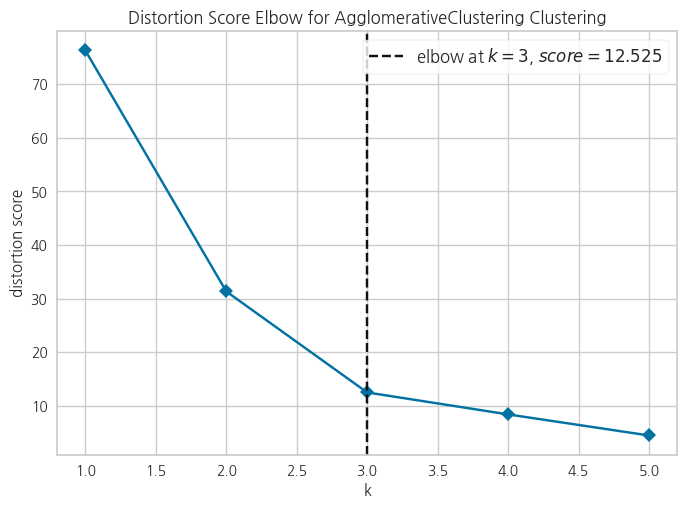

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

k=0
agg = AgglomerativeClustering(n_clusters=k)
visualizer = KElbowVisualizer(agg, k=(1,6), timings=False)
visualizer.fit(principalDf)
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

sklearn.cluster._kmeans.KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


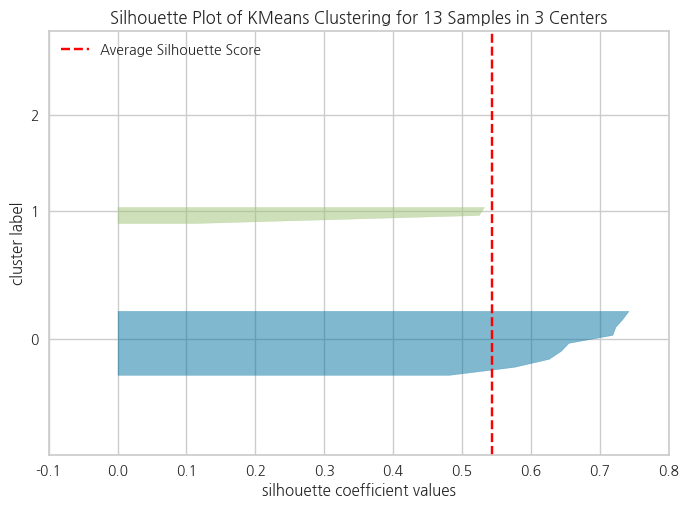

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 13 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_4 = KMeans(n_clusters=3, random_state=42)

visualizer_4 = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')

visualizer_4.fit(principalDf)
visualizer_4.show()

In [147]:
except_data.loc[:,'cluster'] = visualizer_4.predict(principalDf)

<ipython-input-147-5f6530fd8da3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  except_data.loc[:,'cluster'] = visualizer_4.predict(principalDf)


In [42]:
num_df['개선된소멸위험지수등급'] = final_df['개선된소멸위험지수등급']

In [56]:
from sklearn.feature_selection import SelectKBest, chi2

X = num_df.drop(['15세미만', '15세이상65세미만', '65세이상','읍면동','한국인수', '외국인수','과거대비산업체변화',
                   '세대수증감','인구수증감','개선된소멸위험지수','인구변화율(주민등록인구통계)','개선된소멸위험지수','총종사자수증감율','총사업체수증감율',
                 '도소매업체증감율','제조업체증감율','저소득가구원수','한부모가족지원수급가구원수', '국민기초생활보장법수급가구원수'], axis=1)
y = num_df[['개선된소멸위험지수등급']]

f_select = SelectKBest(chi2,k=20)
f_select.fit(X, y)
f_scores = pd.DataFrame()

f_scores['chi'] = f_select.scores_
f_scores['p'] = f_select.pvalues_
f_scores['support'] = f_select.get_support()
f_scores['attribute'] = X.columns
f_scores[f_scores['support']==True]['attribute'].values

array(['장애인등록현황수', '음식점수', '업소수', '다문화가구원수', '병상수', '의료종사자수', '세대수',
       '인구밀도', '전입 계', '전출 계', '의료종사자수', '저소득가구수', '국민기초생활보장법수급가구',
       '종사자수(천명당)', '노령화지수(주민등록인구통계)', '고령인구수(주민등록인구통계)',
       '경제활동인구(주민등록인구통계)', '주요산업별종사자수', '총사업체수', '부동산공시지가'], dtype=object)

In [73]:
company_labels = filtered_data['읍면동'].tolist()

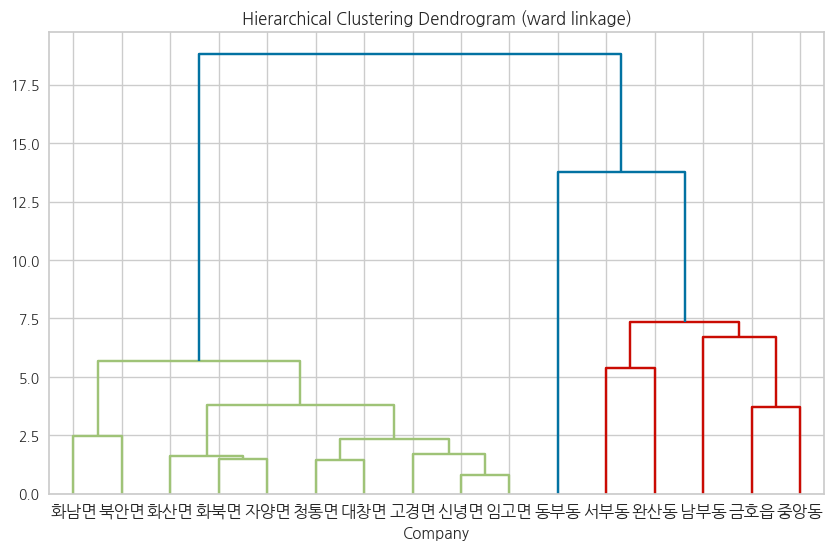

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(filtered_data.drop(['읍면동'],axis=1), method="ward")
fig = plt.figure(figsize=(10, 6))
dendrogram(Z,labels=company_labels)
plt.title('Hierarchical Clustering Dendrogram (ward linkage)')
plt.xlabel('Company')
plt.show()

In [ ]:
#### DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(filtered_data)

In [175]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42, n_init=10)
gmm.fit(principalDf)

GaussianMixture(n_components=4, n_init=10, random_state=42)

In [166]:
principalDf

,principal component1,principal component2
0,3.369238,-2.392456
1,-0.347045,0.644942
2,-0.973042,-0.163135
3,-1.709644,0.036126
4,-1.996115,0.484196
5,-0.912807,-0.501255
6,-2.754208,0.667064
7,-1.158504,-0.196630
8,-0.436402,-0.625172
9,0.783811,-1.013404


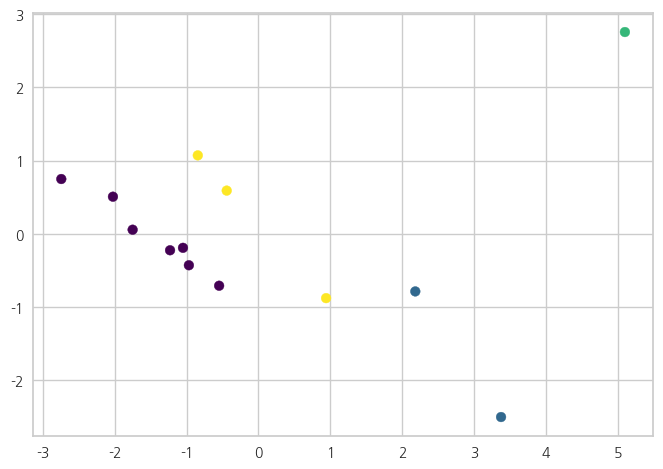

In [176]:
labels = gmm.predict(principalDf)
plt.scatter(principalDf['principal component1'], principalDf['principal component2'], c=labels, cmap='viridis')

In [178]:
except_data['cluster']=labels
except_data['cluster']=labels

<ipython-input-178-6b2e8f7de5d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  except_data['cluster']=labels


In [179]:
except_data

,장애인등록현황수,음식점수,업소수,다문화가구원수,병상수,세대수,인구밀도,전입 계,전출 계,의료종사자수,...,저소득가구수,국민기초생활보장법수급가구,종사자수(천명당),노령화지수(주민등록인구통계),고령인구수(주민등록인구통계),경제활동인구(주민등록인구통계),주요산업별종사자수,총사업체수,부동산공시지가,cluster
0,1.170815,0.455518,0.377341,0.597291,0.827974,1.146134,-0.201428,0.206389,0.582146,0.459280,...,0.239496,0.230154,0.042151,-0.481737,1.916153,0.613438,1.217532,0.927961,-0.067928,1
1,-0.342853,-0.296369,-0.503623,-0.281327,-0.876238,-0.348896,-0.427333,-0.530454,-0.448264,-0.716477,...,-0.386513,-0.453418,0.739265,0.427841,-0.160104,-0.356100,-0.045075,-0.256817,-0.425581,3
2,-0.432552,-0.055765,-0.296160,-0.204729,-0.876238,-0.355405,-0.442656,-0.628967,-0.497040,-0.618497,...,-0.405483,-0.365215,-0.405054,0.350803,-0.170963,-0.406369,-0.534629,-0.462647,-0.439532,0
3,-0.205501,-0.807652,-0.786253,-0.470568,-0.876238,-0.546447,-0.429390,-0.607857,-0.537688,-0.856448,...,-0.500333,-0.475469,-0.485749,1.120093,-0.365340,-0.488030,-0.506279,-0.866777,-0.572871,0
4,-0.867030,-0.817677,-0.756186,-0.619257,-0.876238,-0.742084,-0.482482,-0.713408,-0.674872,-0.842451,...,-0.576213,-0.563672,-0.743953,0.035670,-0.912638,-0.612113,-0.802915,-0.982242,-0.612896,0
5,-0.454976,-0.597124,-0.656965,-0.538154,0.794689,-0.547978,-0.461867,-0.475165,-0.577319,-0.156593,...,-0.557243,-0.585722,-0.650123,1.184212,-0.491306,-0.494606,-0.726163,-0.906939,-0.574582,0
6,-1.099687,-0.927954,-0.861420,-0.623762,-0.876238,-0.952268,-0.499111,-0.849115,-0.804944,-0.926433,...,-0.557243,-0.541621,-0.985050,1.323889,-1.390438,-0.710318,-0.829191,-1.198113,-0.665105,0
7,-0.241942,-0.386595,-0.617877,-0.254292,-0.876238,-0.349662,-0.448941,-0.463102,-0.439118,-0.870445,...,-0.443423,-0.431367,-0.396289,0.418619,0.103772,-0.395764,-0.421921,-0.655927,-0.497843,0
8,-0.121409,-0.236218,-0.383355,-0.366936,-0.876238,0.103250,-0.447523,-0.025822,0.226482,-0.772465,...,-0.310633,-0.365215,-0.491835,-0.545920,0.306837,-0.128510,-0.298841,-0.384833,-0.493482,0
9,0.697093,-0.597124,-0.638924,-0.511119,2.319160,-0.258926,-0.427347,-0.476170,-0.481798,0.081358,...,-0.443423,-0.409317,0.090370,1.699052,0.179786,-0.352919,0.071091,-0.547991,-0.538416,3


# 군집화 결과 시각화


In [3]:
gmm = pd.read_csv("/content/drive/Othercomputers/내 노트북/DNA/DNA/영천시 공모전/final_dataframe/gmm3(수정).csv")

In [4]:
sc = pd.read_csv("/content/drive/Othercomputers/내 노트북/DNA/DNA/영천시 공모전/final_dataframe/sc4.csv")

In [19]:
sc3 = pd.read_csv("/content/drive/Othercomputers/내 노트북/DNA/DNA/영천시 공모전/final_dataframe/sc4.csv")

In [29]:
sc

,읍면동,어린이집수,사설학원수,세대수,인구밀도,전입 계,전출 계,저소득가구수,저소득가구원수,한부모가족지원수급가구원수,...,의료종사자수,병원수,병상수,공장 수,음식점수,업소수,행사수(2015_2020),개선된소멸위험지수,개선된소멸위험지수등급,군집
0,금호읍,4.0,3.0,6235.0,223.63,1184.0,1499.0,44.0,110.0,28.0,...,103.0,8.0,256.0,158.0,145.0,447.0,12.0,-0.057213,1.0,3.0
1,청통면,1.0,2.0,2330.0,64.41,451.0,485.0,11.0,28.0,20.0,...,19.0,0.0,0.0,168.0,70.0,154.0,9.0,-0.010280,2.0,2.0
2,신녕면,1.0,1.0,2313.0,53.61,353.0,437.0,10.0,24.0,3.0,...,26.0,6.0,0.0,24.0,94.0,223.0,3.0,-0.073636,1.0,2.0
3,화산면,0.0,0.0,1814.0,62.96,374.0,397.0,5.0,14.0,2.0,...,9.0,0.0,0.0,51.0,19.0,60.0,4.0,-0.018632,1.0,0.0
4,화북면,0.0,0.0,1303.0,25.54,269.0,262.0,1.0,2.0,0.0,...,10.0,0.0,0.0,4.0,18.0,70.0,5.0,0.022153,2.0,0.0
5,화남면,0.0,0.0,1810.0,40.07,506.0,358.0,2.0,5.0,5.0,...,59.0,1.0,251.0,28.0,40.0,103.0,3.0,0.162331,4.0,0.0
6,자양면,0.0,0.0,754.0,13.82,134.0,134.0,2.0,4.0,0.0,...,4.0,0.0,0.0,1.0,7.0,35.0,3.0,0.011654,2.0,0.0
7,임고면,1.0,0.0,2328.0,49.18,518.0,494.0,8.0,18.0,6.0,...,8.0,0.0,0.0,59.0,61.0,116.0,15.0,0.033140,2.0,2.0
8,고경면,2.0,0.0,3511.0,50.18,953.0,1149.0,15.0,40.0,18.0,...,15.0,0.0,0.0,84.0,76.0,194.0,14.0,-0.047998,1.0,2.0
9,북안면,0.0,0.0,2565.0,64.40,505.0,452.0,8.0,21.0,1.0,...,76.0,2.0,480.0,73.0,40.0,109.0,2.0,0.061120,3.0,0.0


In [5]:
a = sp4_mean.transpose()

In [267]:
a.columns

RangeIndex(start=0, stop=22, step=1)

In [258]:
a.reset_index(drop=True, inplace=True)

In [256]:
a =a[['군집','어린이집수', '사설학원수', '세대수', '인구밀도', '전입 계', '전출 계', '저소득가구수',
       '저소득가구원수', '한부모가족지원수급가구원수', '국민기초생활보장법수급가구',
       '국민기초생활보장법수급가구원수', '장애인등록현황수', '의료종사자수', '병원수', '병상수', '공장 수',
       '음식점수', '업소수', '행사수(2015_2020)']]

In [259]:
a.rename(columns={})

,군집,어린이집수,사설학원수,세대수,인구밀도,전입 계,전출 계,저소득가구수,저소득가구원수,한부모가족지원수급가구원수,국민기초생활보장법수급가구,국민기초생활보장법수급가구원수,장애인등록현황수,의료종사자수,병원수,병상수,공장 수,음식점수,업소수,행사수(2015_2020)
0,0.0,0.000000,0.000000,2187.500000,52.235000,505.500000,405.000000,5.000000,13.000000,3.000000,4.00,10.000000,574.500000,67.50,1.5,365.5,50.50,40.000000,106.00,2.50
1,1.0,1.250000,0.750000,2620.500000,54.345000,568.750000,641.250000,11.000000,27.500000,11.750000,8.25,15.750000,429.750000,17.00,1.5,0.0,83.75,75.250000,171.75,10.25
2,2.0,2.666667,2.333333,3778.666667,238.033333,890.666667,1047.666667,26.333333,71.333333,12.666667,23.00,58.666667,578.333333,146.00,11.0,263.0,122.00,100.333333,378.00,39.00
3,3.0,0.000000,0.000000,1416.250000,42.312500,306.000000,285.500000,3.250000,8.000000,1.750000,3.25,6.250000,286.000000,7.25,0.0,0.0,59.75,17.250000,62.75,3.75


In [263]:
a.columns

MultiIndex([(             '군집',),
            (          '어린이집수',),
            (          '사설학원수',),
            (            '세대수',),
            (           '인구밀도',),
            (           '전입 계',),
            (           '전출 계',),
            (         '저소득가구수',),
            (        '저소득가구원수',),
            (  '한부모가족지원수급가구원수',),
            (  '국민기초생활보장법수급가구',),
            ('국민기초생활보장법수급가구원수',),
            (       '장애인등록현황수',),
            (         '의료종사자수',),
            (            '병원수',),
            (            '병상수',),
            (           '공장 수',),
            (           '음식점수',),
            (            '업소수',),
            ( '행사수(2015_2020)',)],
           )

In [223]:
index = a['군집'].values

In [224]:
index

array([[0.],
       [1.],
       [2.],
       [3.]])

In [7]:
import seaborn as sns

In [18]:
sc.loc[sc['군집']==3]

,읍면동,어린이집수,사설학원수,세대수,인구밀도,전입 계,전출 계,저소득가구수,저소득가구원수,한부모가족지원수급가구원수,...,의료종사자수,병원수,병상수,공장 수,음식점수,업소수,행사수(2015_2020),개선된소멸위험지수,개선된소멸위험지수등급,군집
0,금호읍,4.0,3.0,6235.0,223.63,1184.0,1499.0,44.0,110.0,28.0,...,103.0,8.0,256.0,158.0,145.0,447.0,12.0,-0.057213,1.0,3.0


In [10]:
num_gmm= gmm.drop('읍면동', axis=1)

In [21]:
num_sc3 = sc3.drop('읍면동', axis=1)

In [22]:
군집0 = num_sc3.loc[num_sc3['군집']==0].mean()
군집1 = num_sc3.loc[num_sc3['군집']==1].mean()
군집2 = num_sc3.loc[num_sc3['군집']==2].mean()


In [8]:
군집0 = num_sc4.loc[num_sc4['군집']==0].mean()
군집1 = num_sc4.loc[num_sc4['군집']==1].mean()
군집2 = num_sc4.loc[num_sc4['군집']==2].mean()
군집3 = num_sc4.loc[num_sc4['군집']==3].mean()

In [24]:
sc_mean = pd.DataFrame([군집0, 군집1, 군집2])

# 인덱스를 군집 번호로 설정합니다
sc_mean.index = ['군집0','군집1', '군집2']

# 결과 출력
print(sc_mean)

     어린이집수  사설학원수          세대수     인구밀도    전입 계        전출 계     저소득가구수  \
군집0   0.00   0.00  1673.333333   45.620  372.50  325.333333   3.833333   
군집1   2.00   2.00  2550.500000  245.235  744.00  822.000000  17.500000   
군집2   1.25   0.75  2620.500000   54.345  568.75  641.250000  11.000000   

       저소득가구원수  한부모가족지원수급가구원수  국민기초생활보장법수급가구  ...      의료종사자수   병원수  \
군집0   9.666667       2.166667           3.50  ...   27.333333   0.5   
군집1  52.000000       5.000000          16.00  ...  167.500000  12.5   
군집2  27.500000      11.750000           8.25  ...   17.000000   1.5   

            병상수        공장 수       음식점수         업소수  행사수(2015_2020)  개선된소멸위험지수  \
군집0  121.833333   56.666667  24.833333   77.166667        3.333333   0.060968   
군집1  266.500000  104.000000  78.000000  343.500000       52.500000   0.034704   
군집2    0.000000   83.750000  75.250000  171.750000       10.250000  -0.024693   

     개선된소멸위험지수등급   군집  
군집0          2.5  0.0  
군집1          3.0  1.0  
군집2          1.5  2.0

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
sc_mean.columns

Index(['어린이집수', '사설학원수', '세대수', '인구밀도', '전입 계', '전출 계', '저소득가구수', '저소득가구원수',
       '한부모가족지원수급가구원수', '국민기초생활보장법수급가구', '국민기초생활보장법수급가구원수', '장애인등록현황수',
       '의료종사자수', '병원수', '병상수', '공장 수', '음식점수', '업소수', '행사수(2015_2020)',
       '개선된소멸위험지수', '개선된소멸위험지수등급', '군집'],
      dtype='object')

In [11]:
cols = [['어린이집수', '사설학원수', '세대수', '인구밀도', '전입 계', '전출 계', '저소득가구수', '저소득가구원수',
       '한부모가족지원수급가구원수', '국민기초생활보장법수급가구', '국민기초생활보장법수급가구원수', '장애인등록현황수',
       '의료종사자수', '병원수', '병상수', '공장 수', '음식점수', '업소수', '행사수(2015_2020)',
       '개선된소멸위험지수', '개선된소멸위험지수등급']]

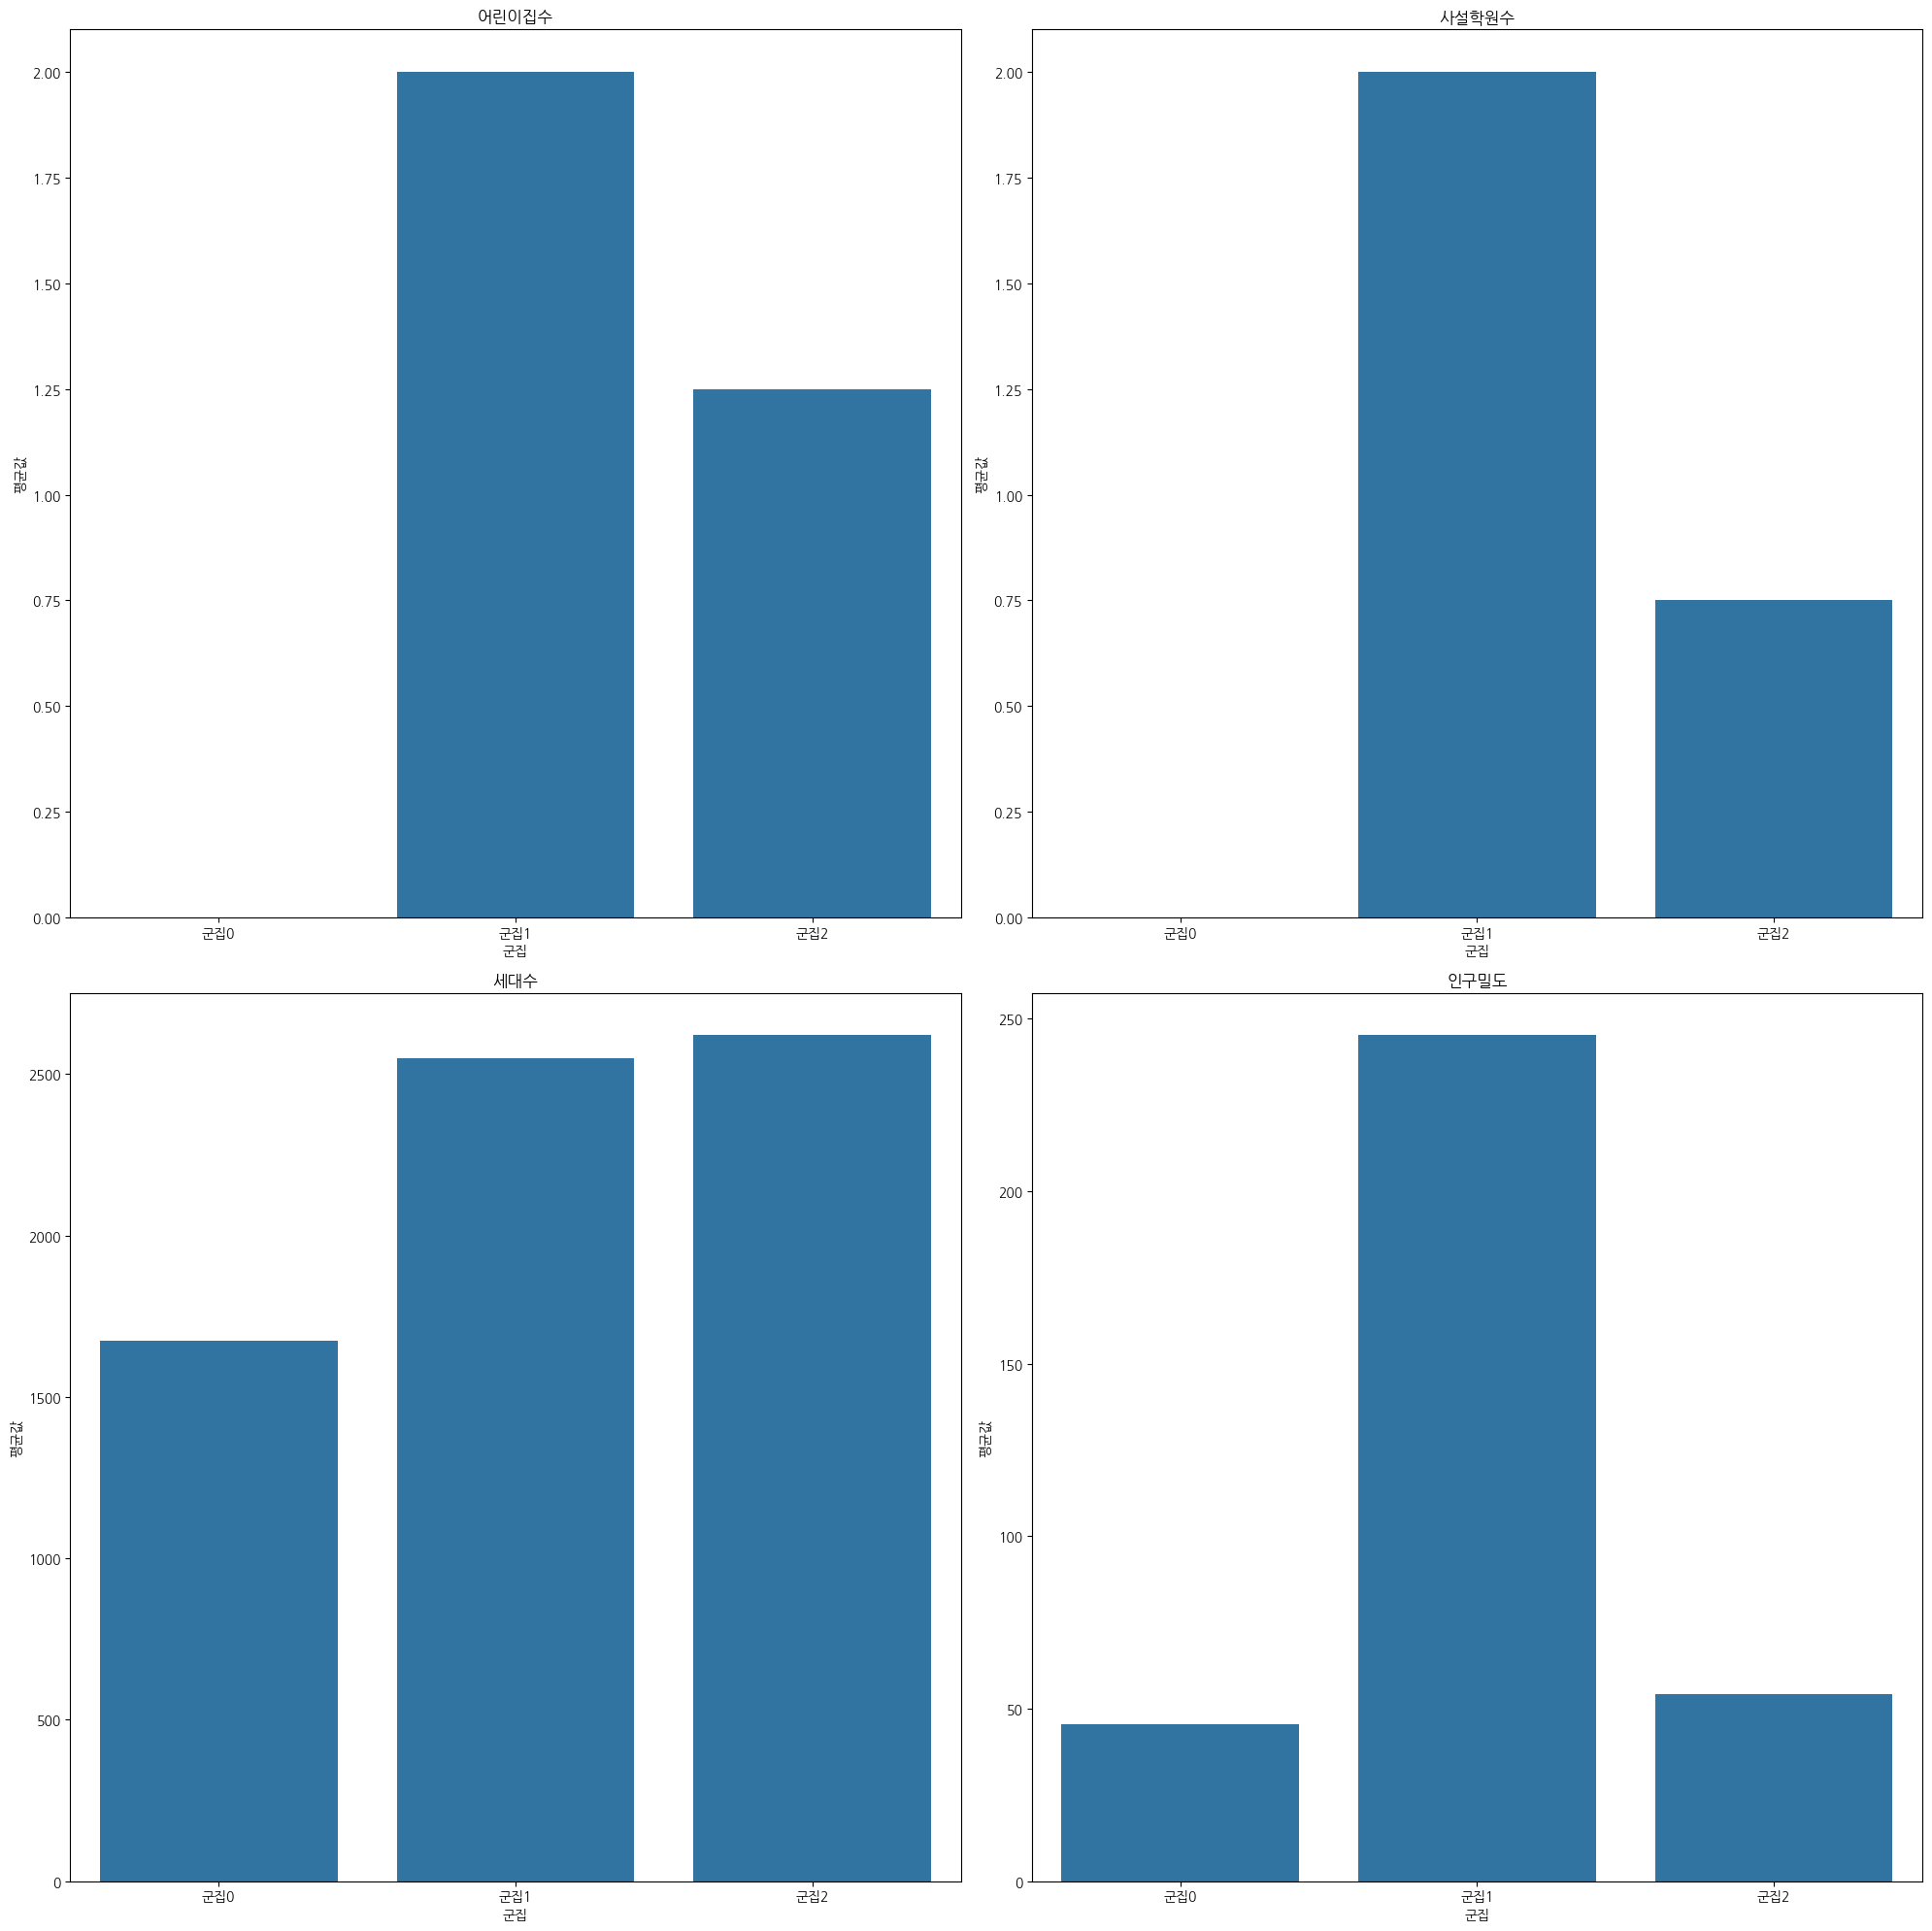

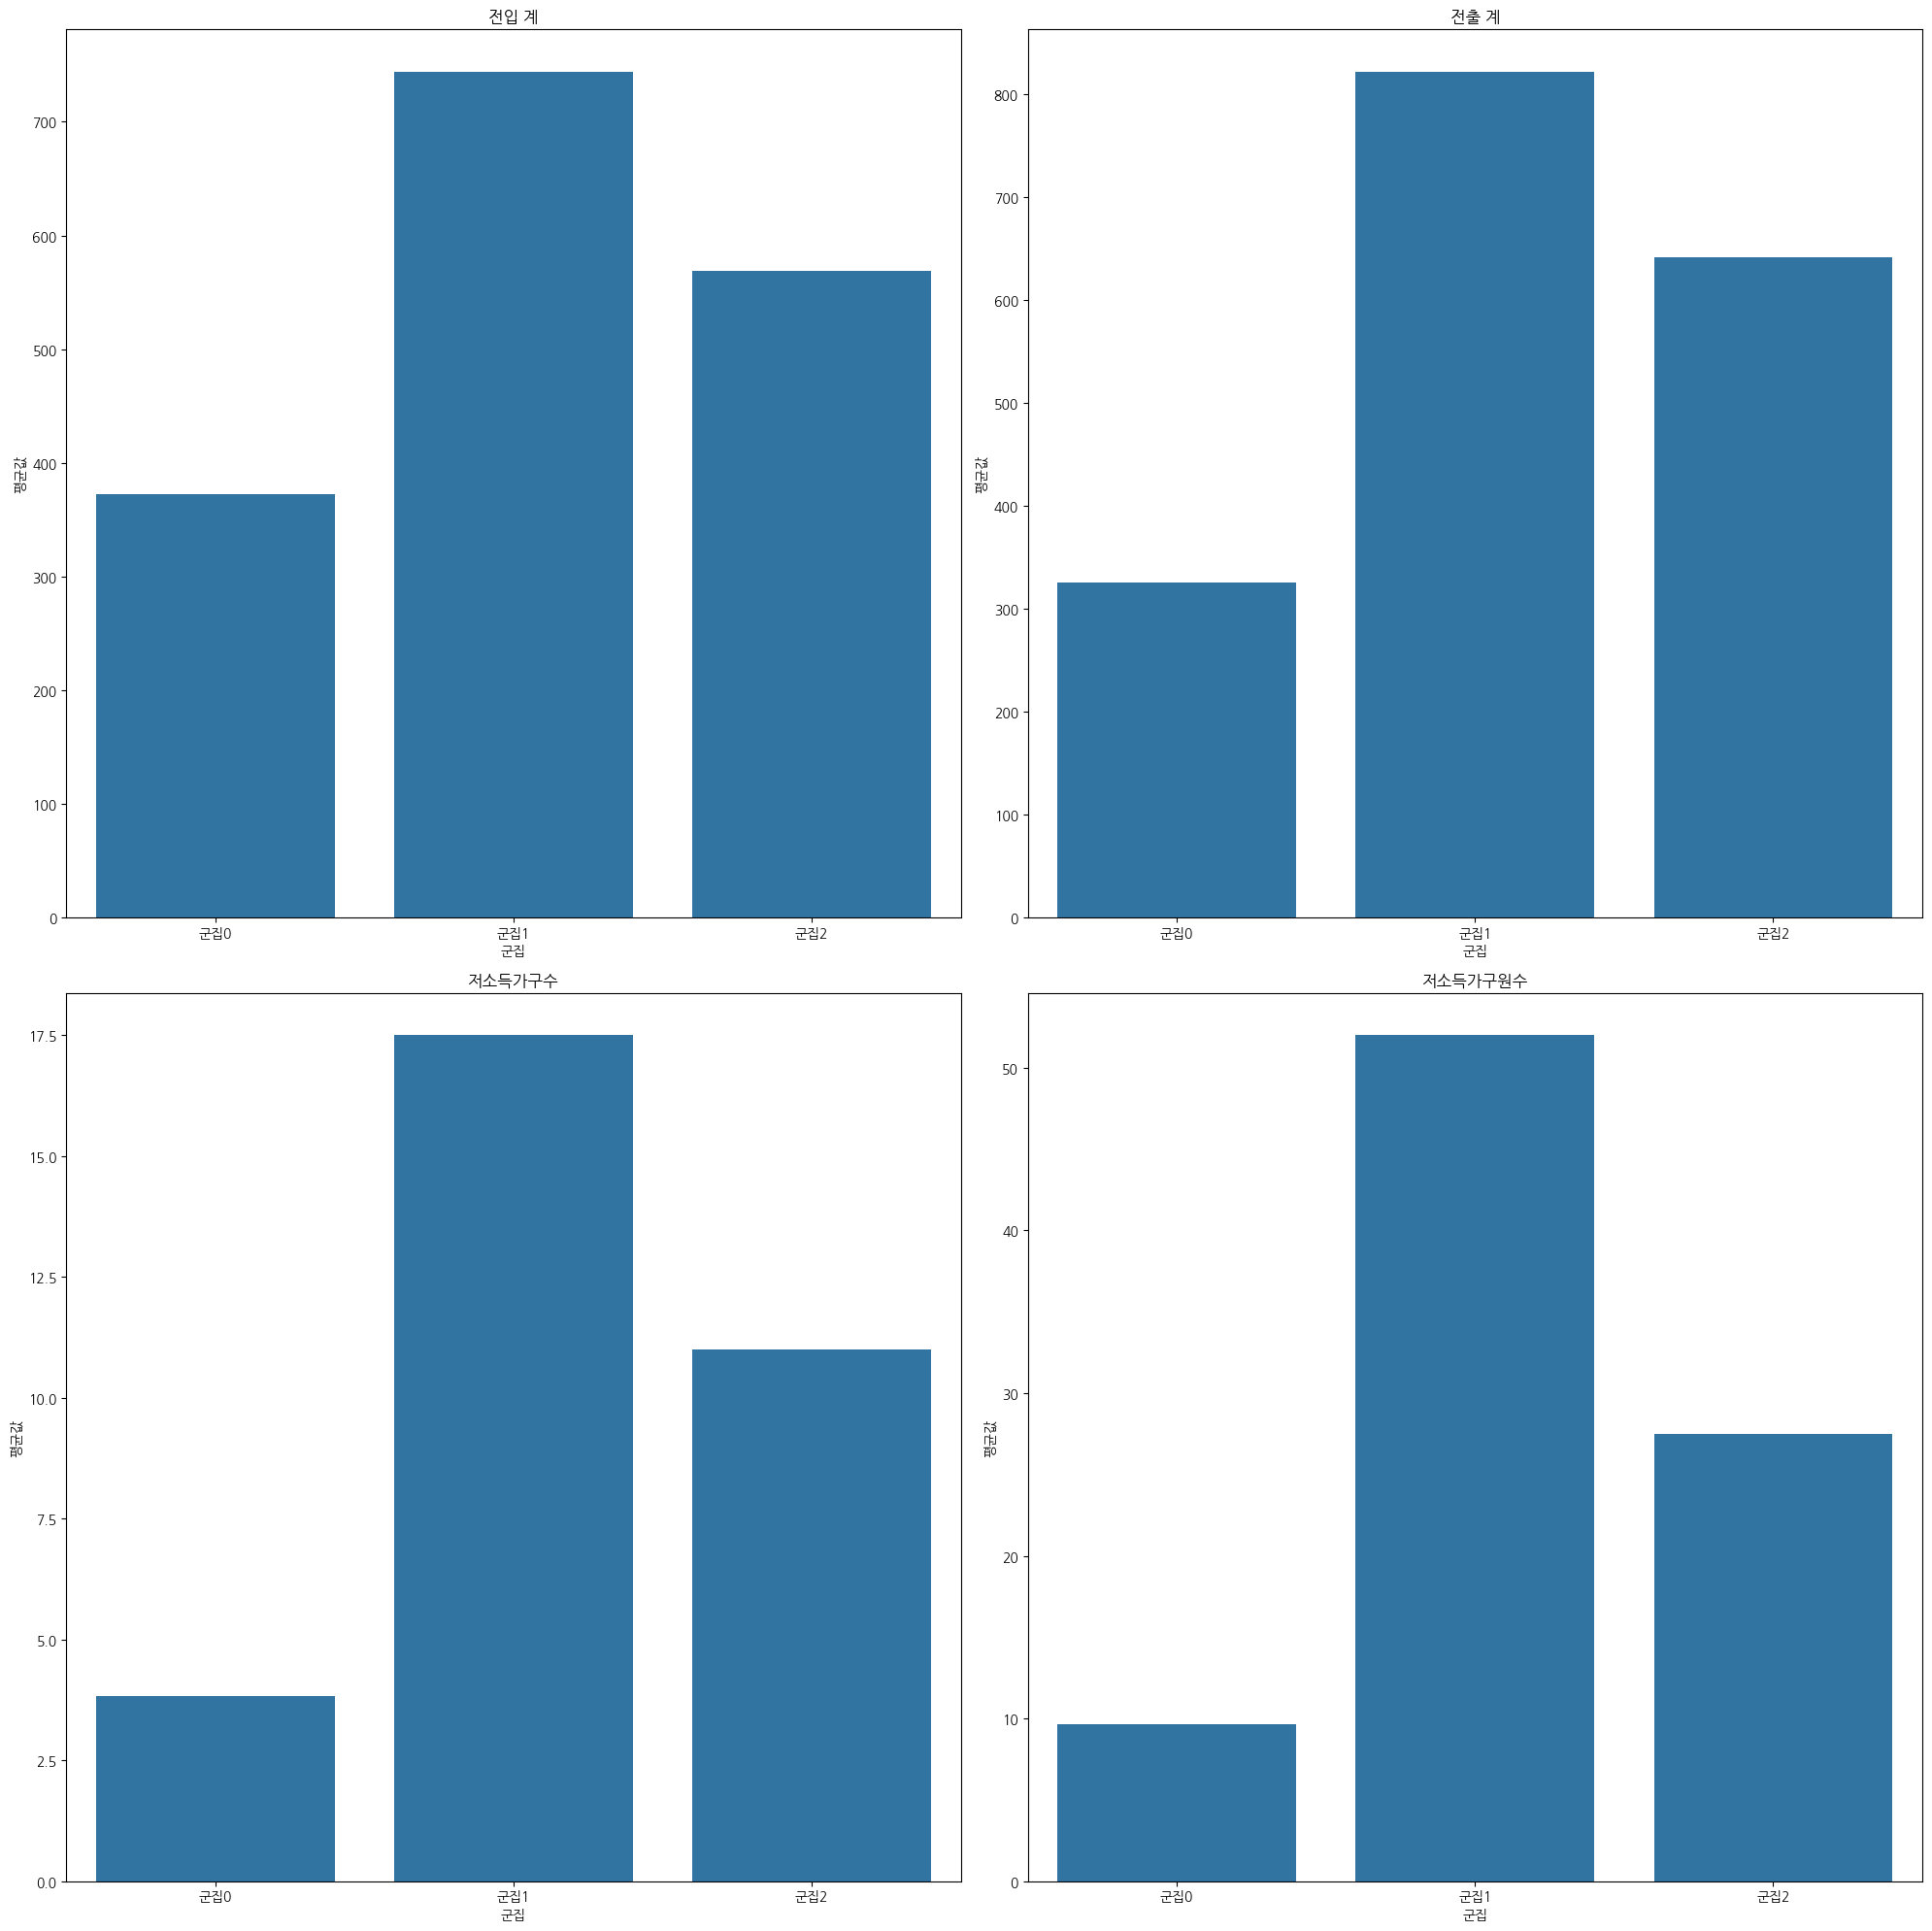

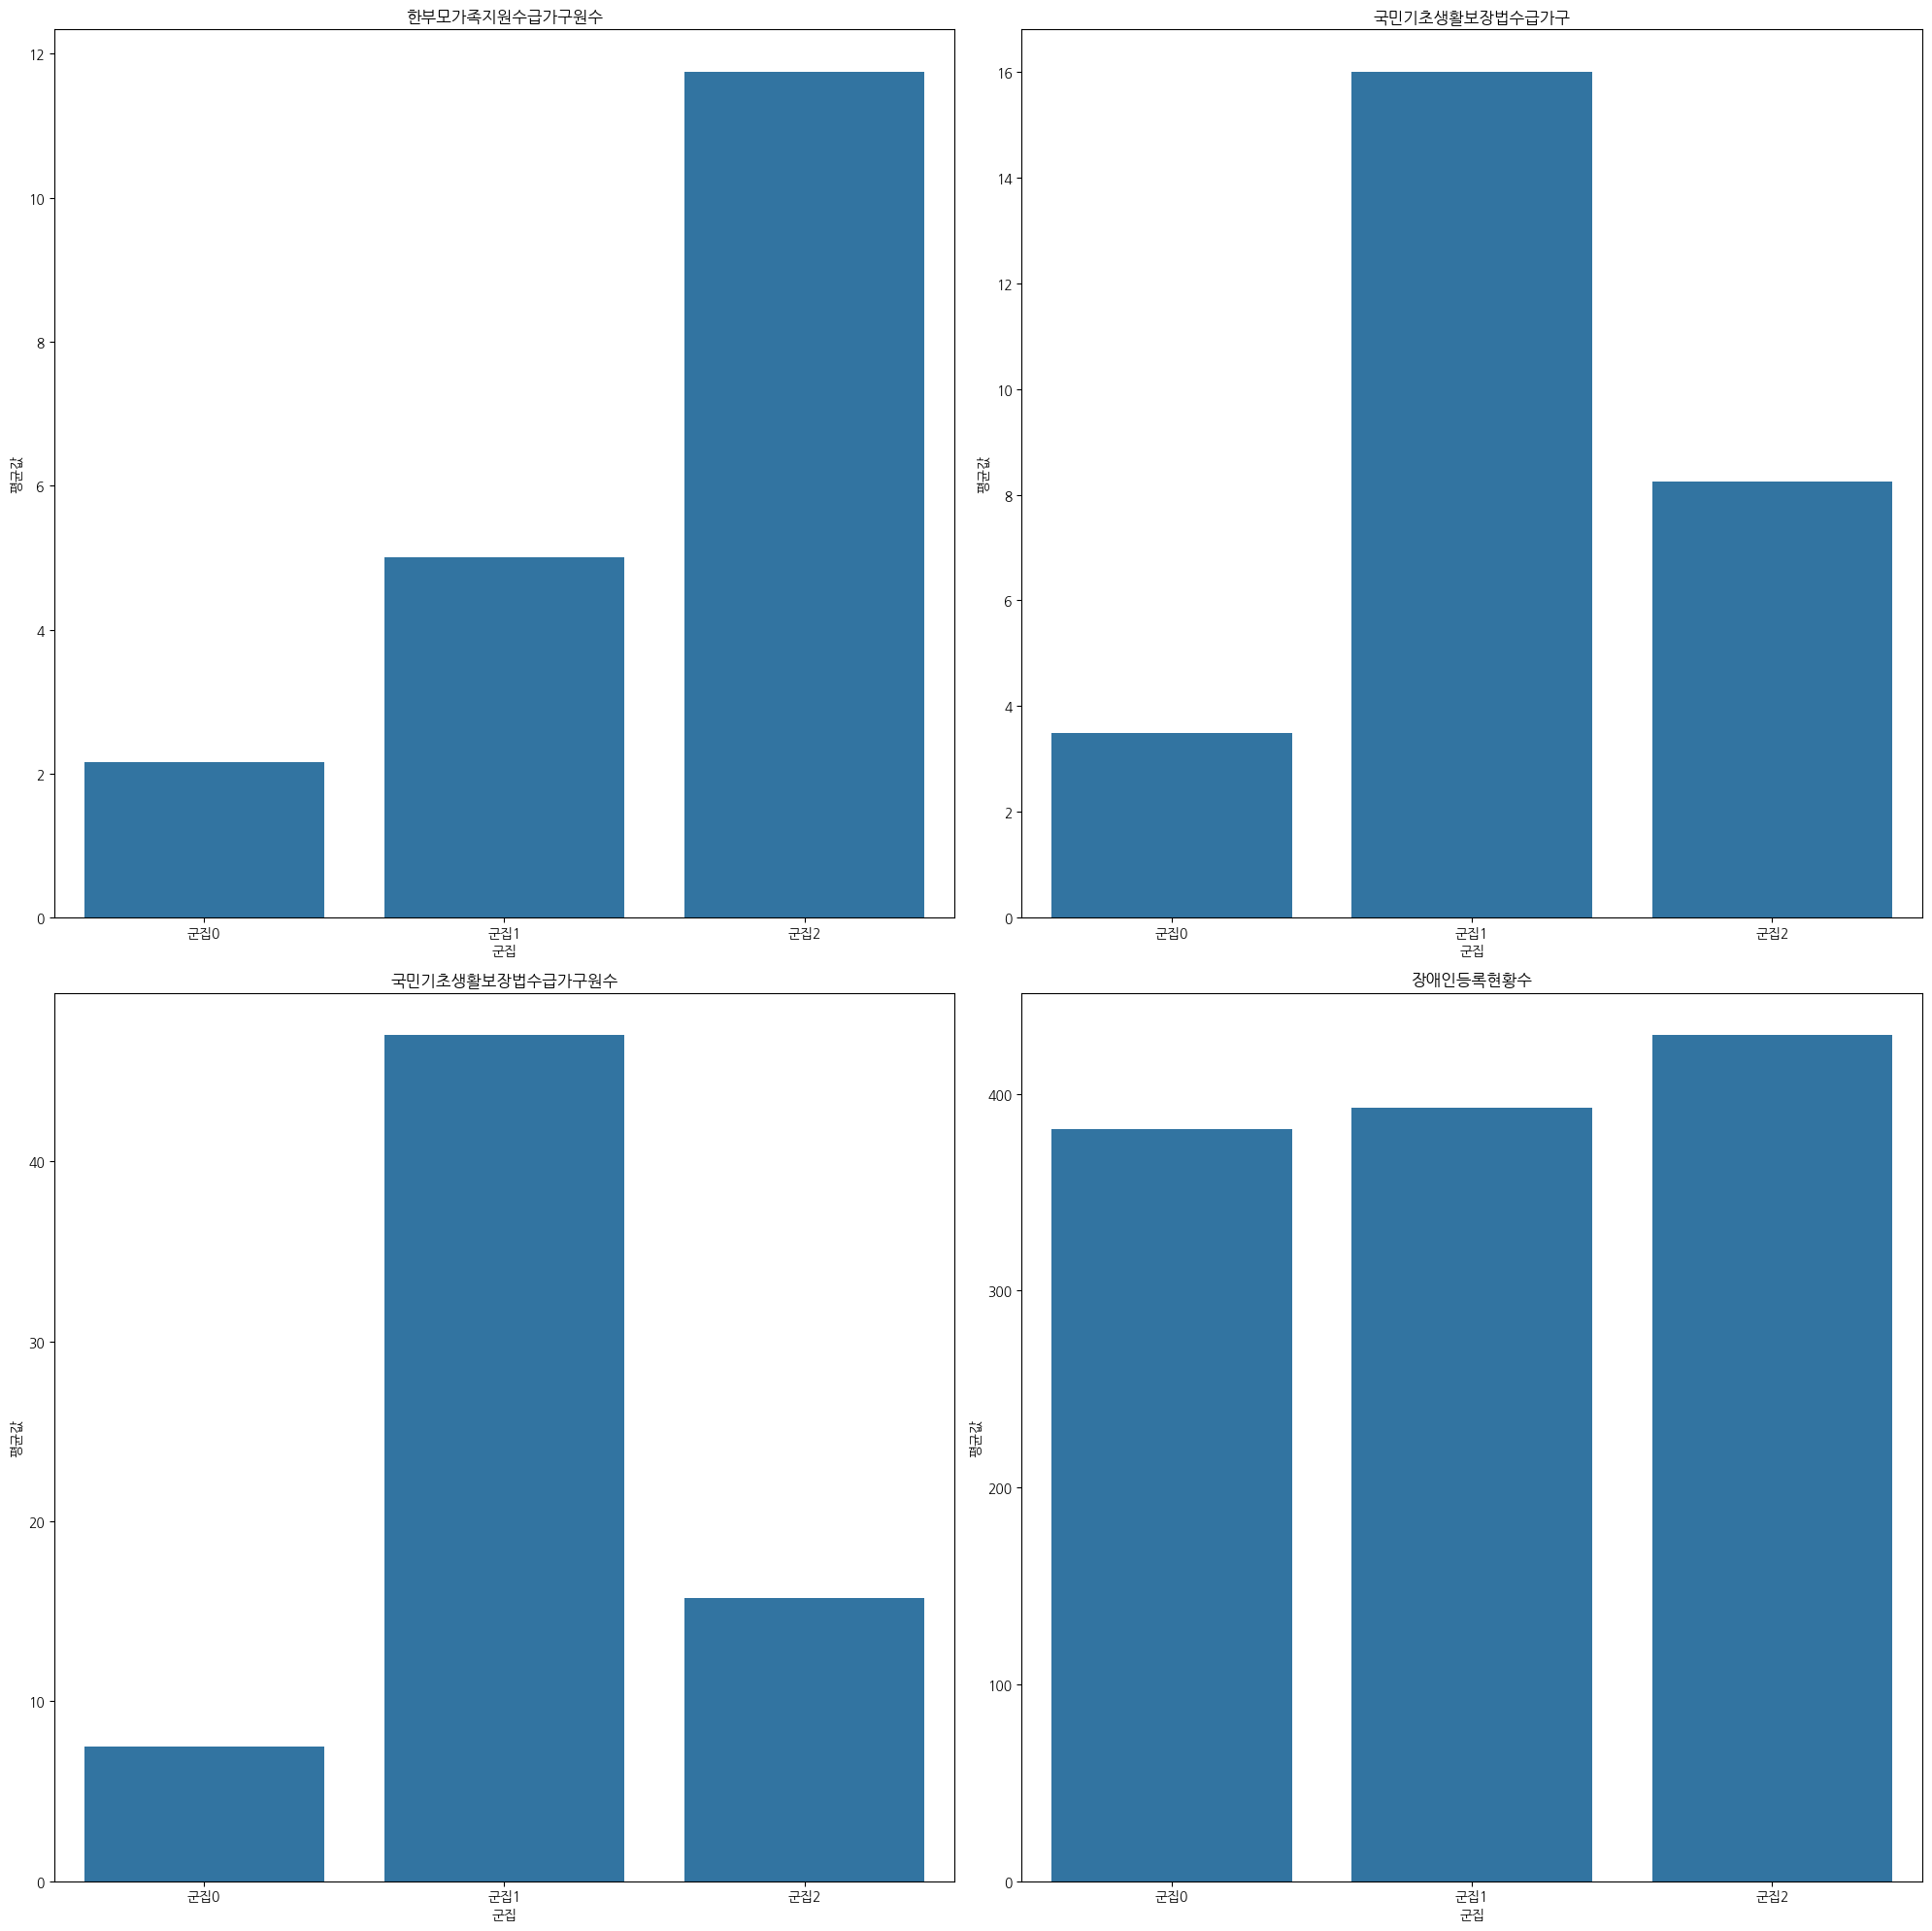

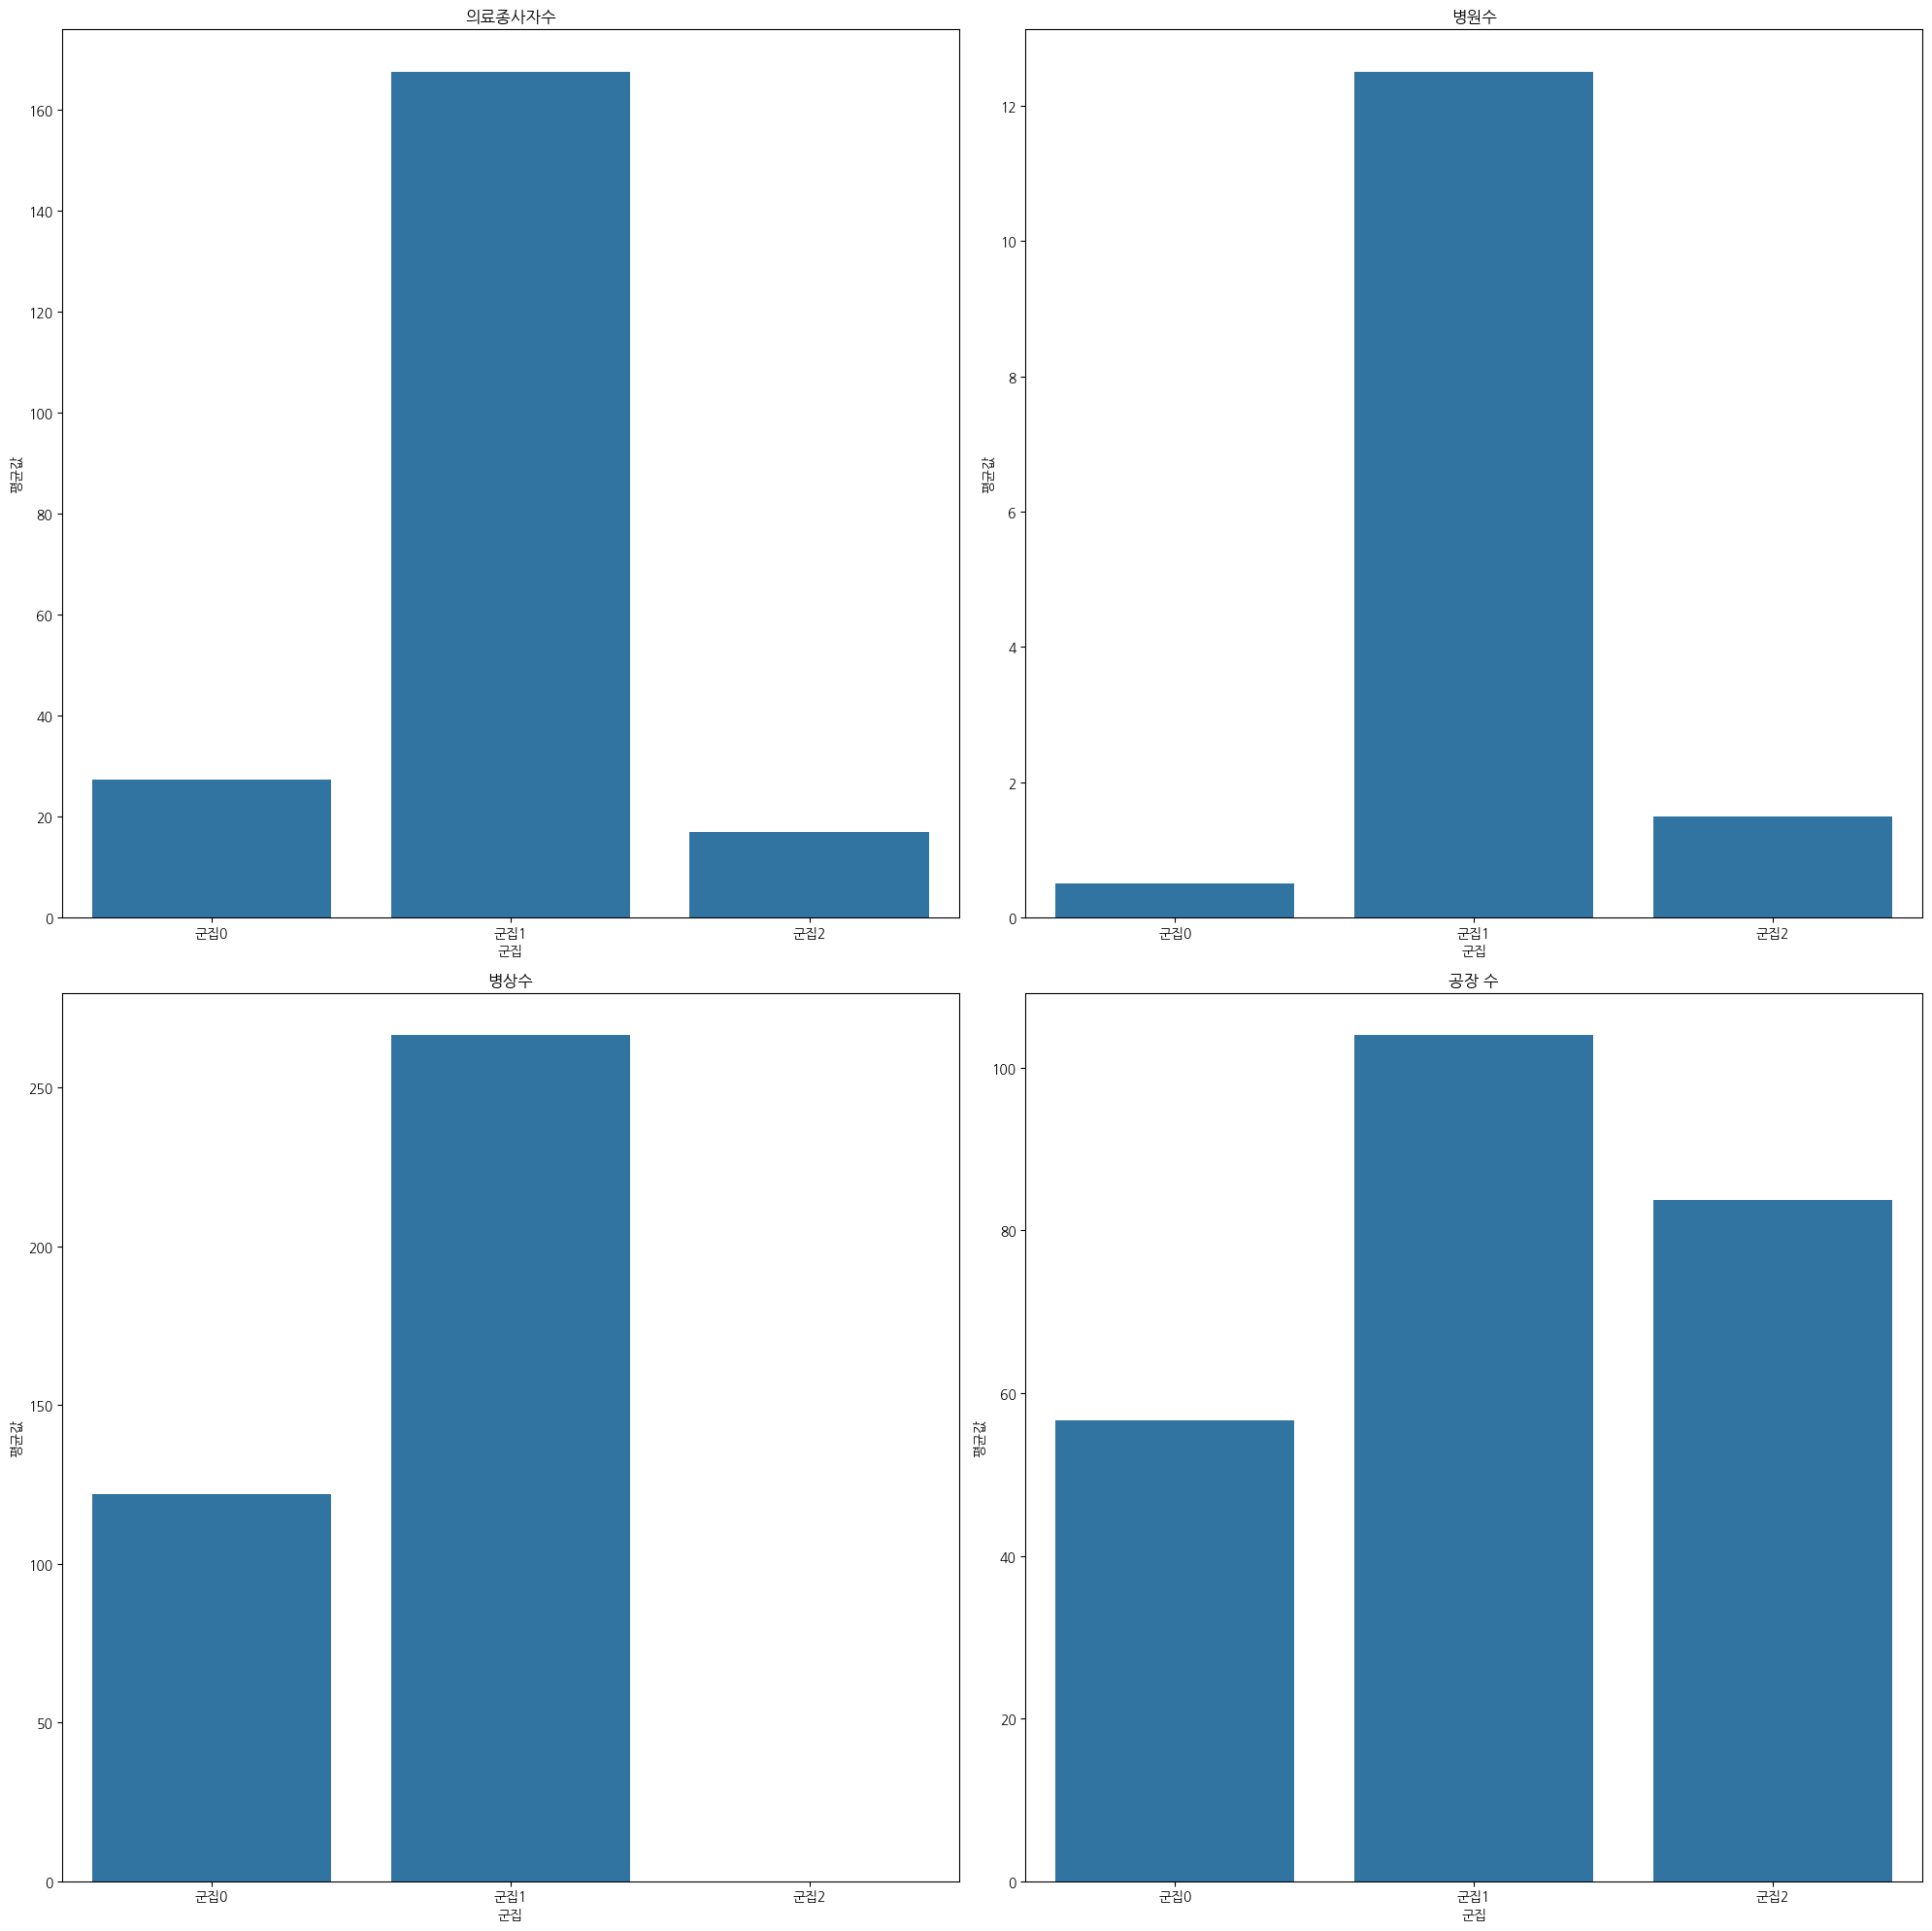

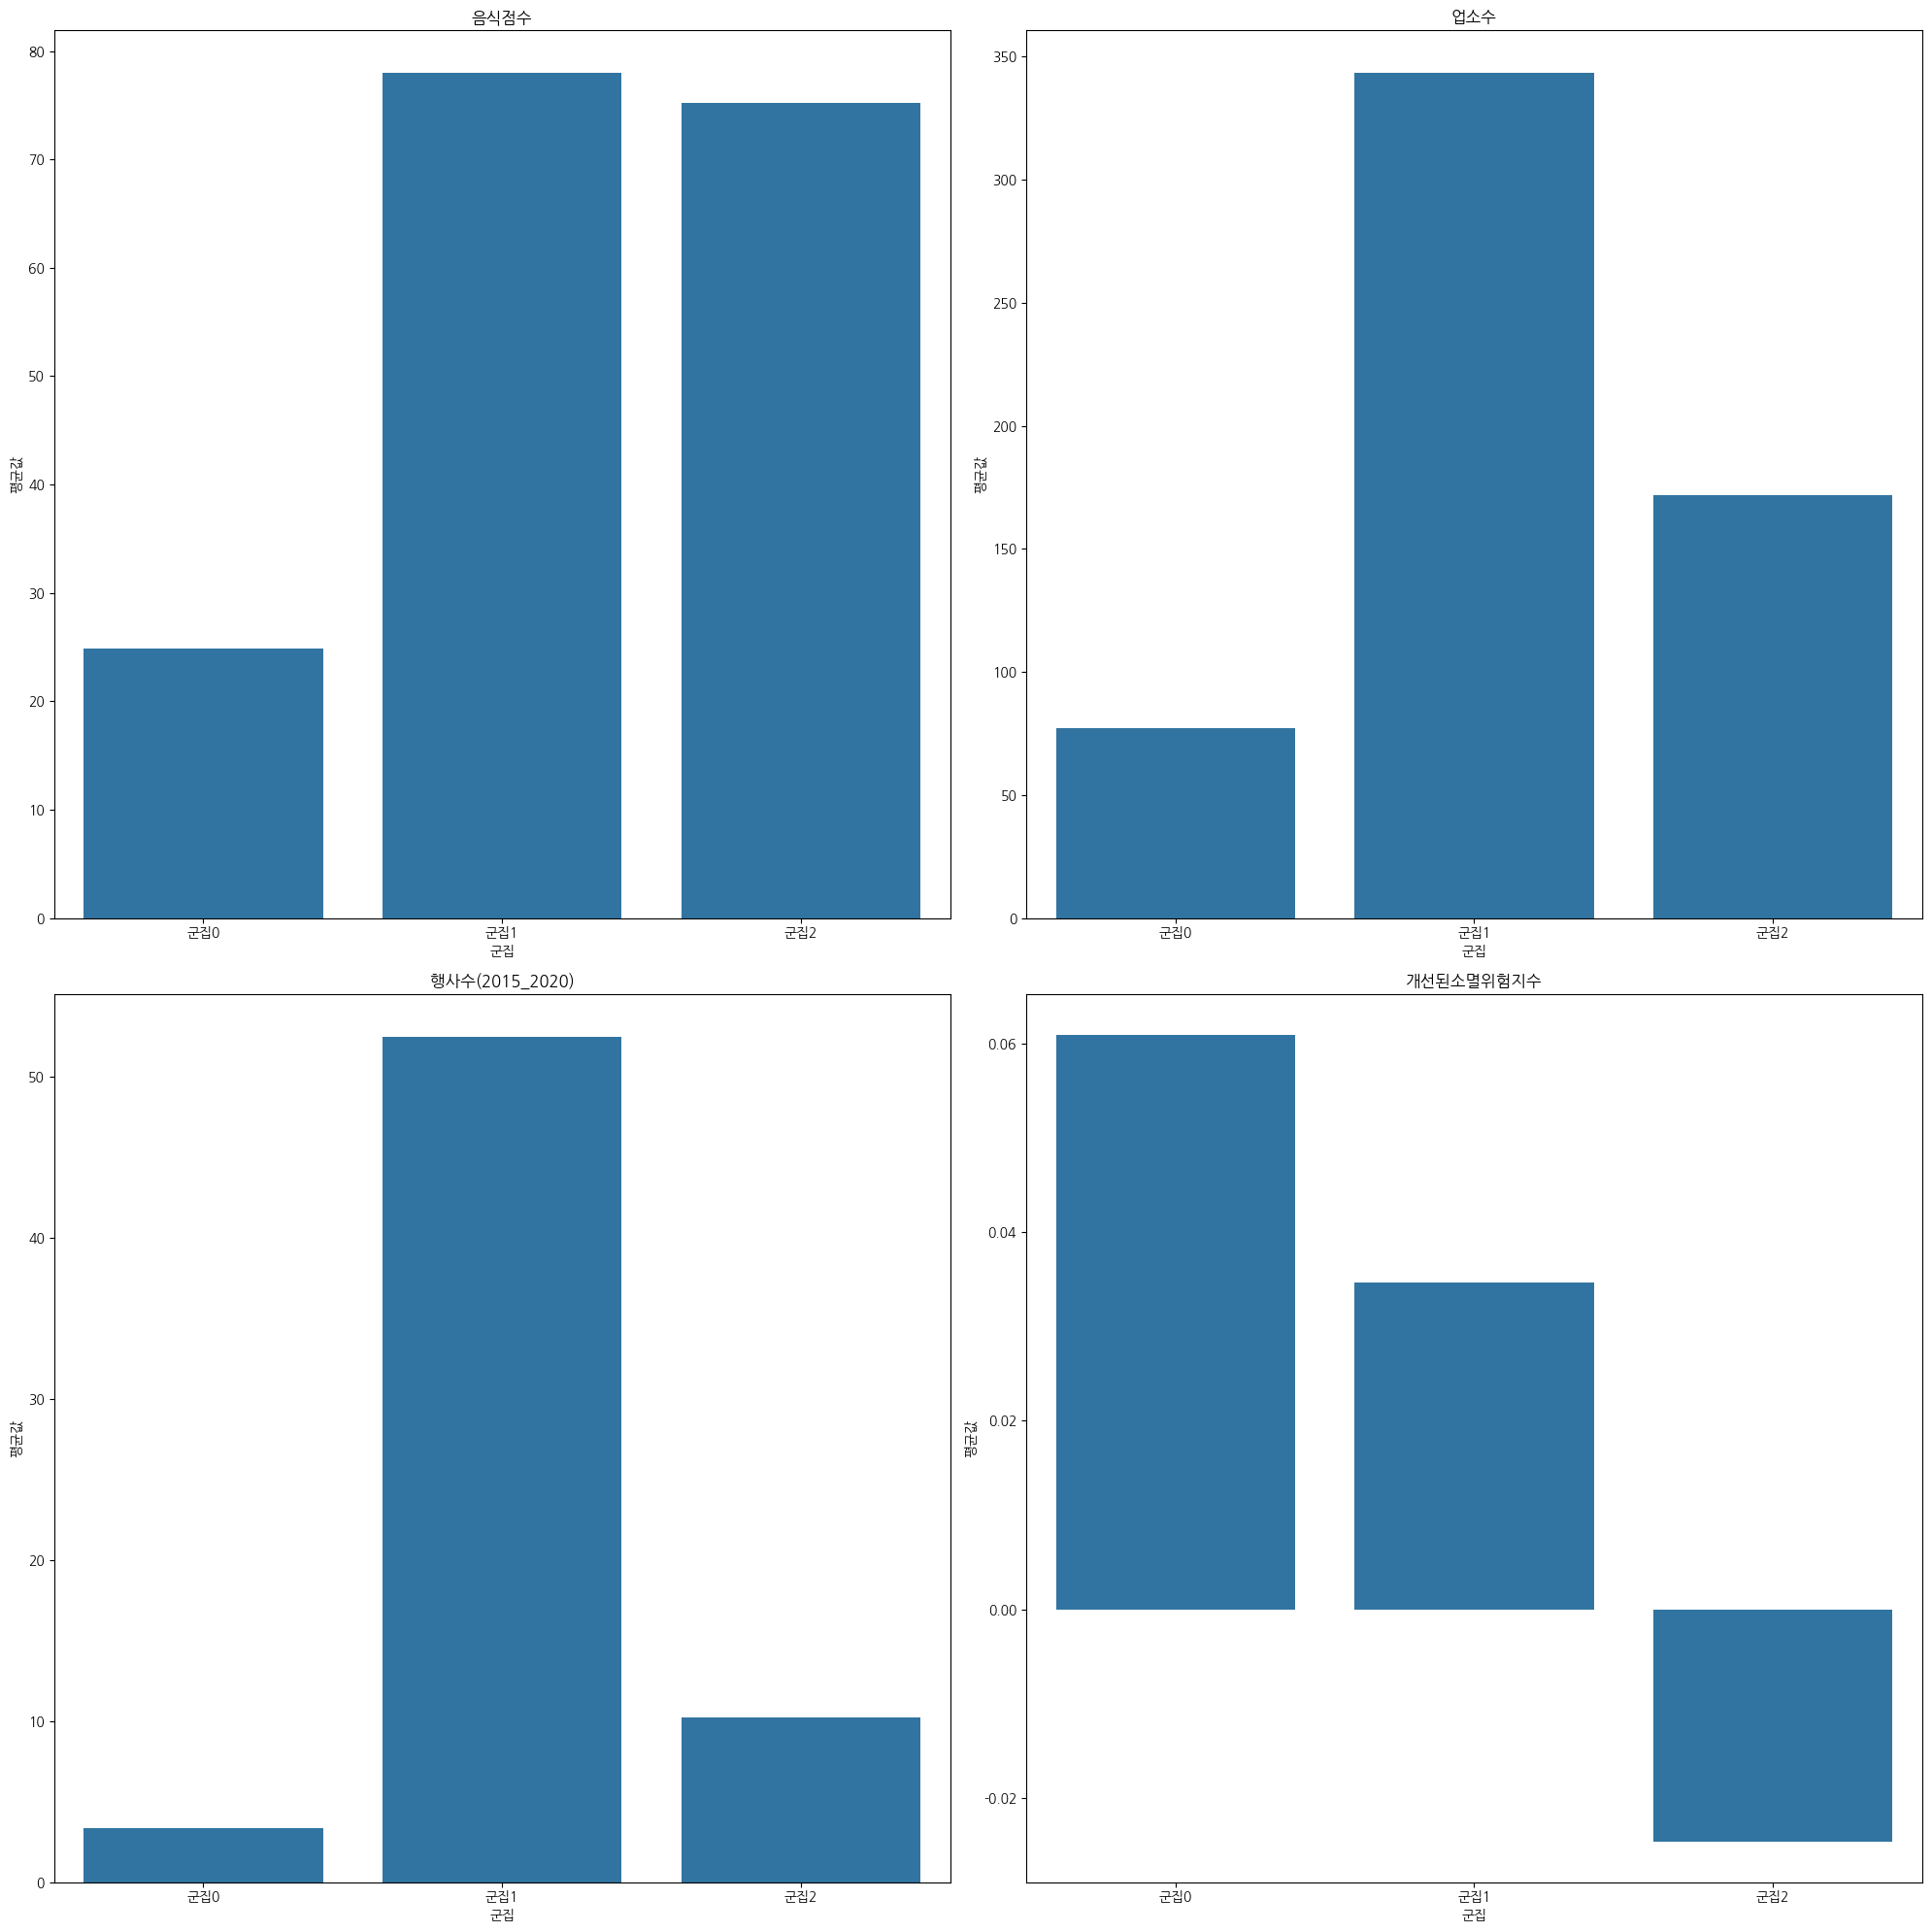

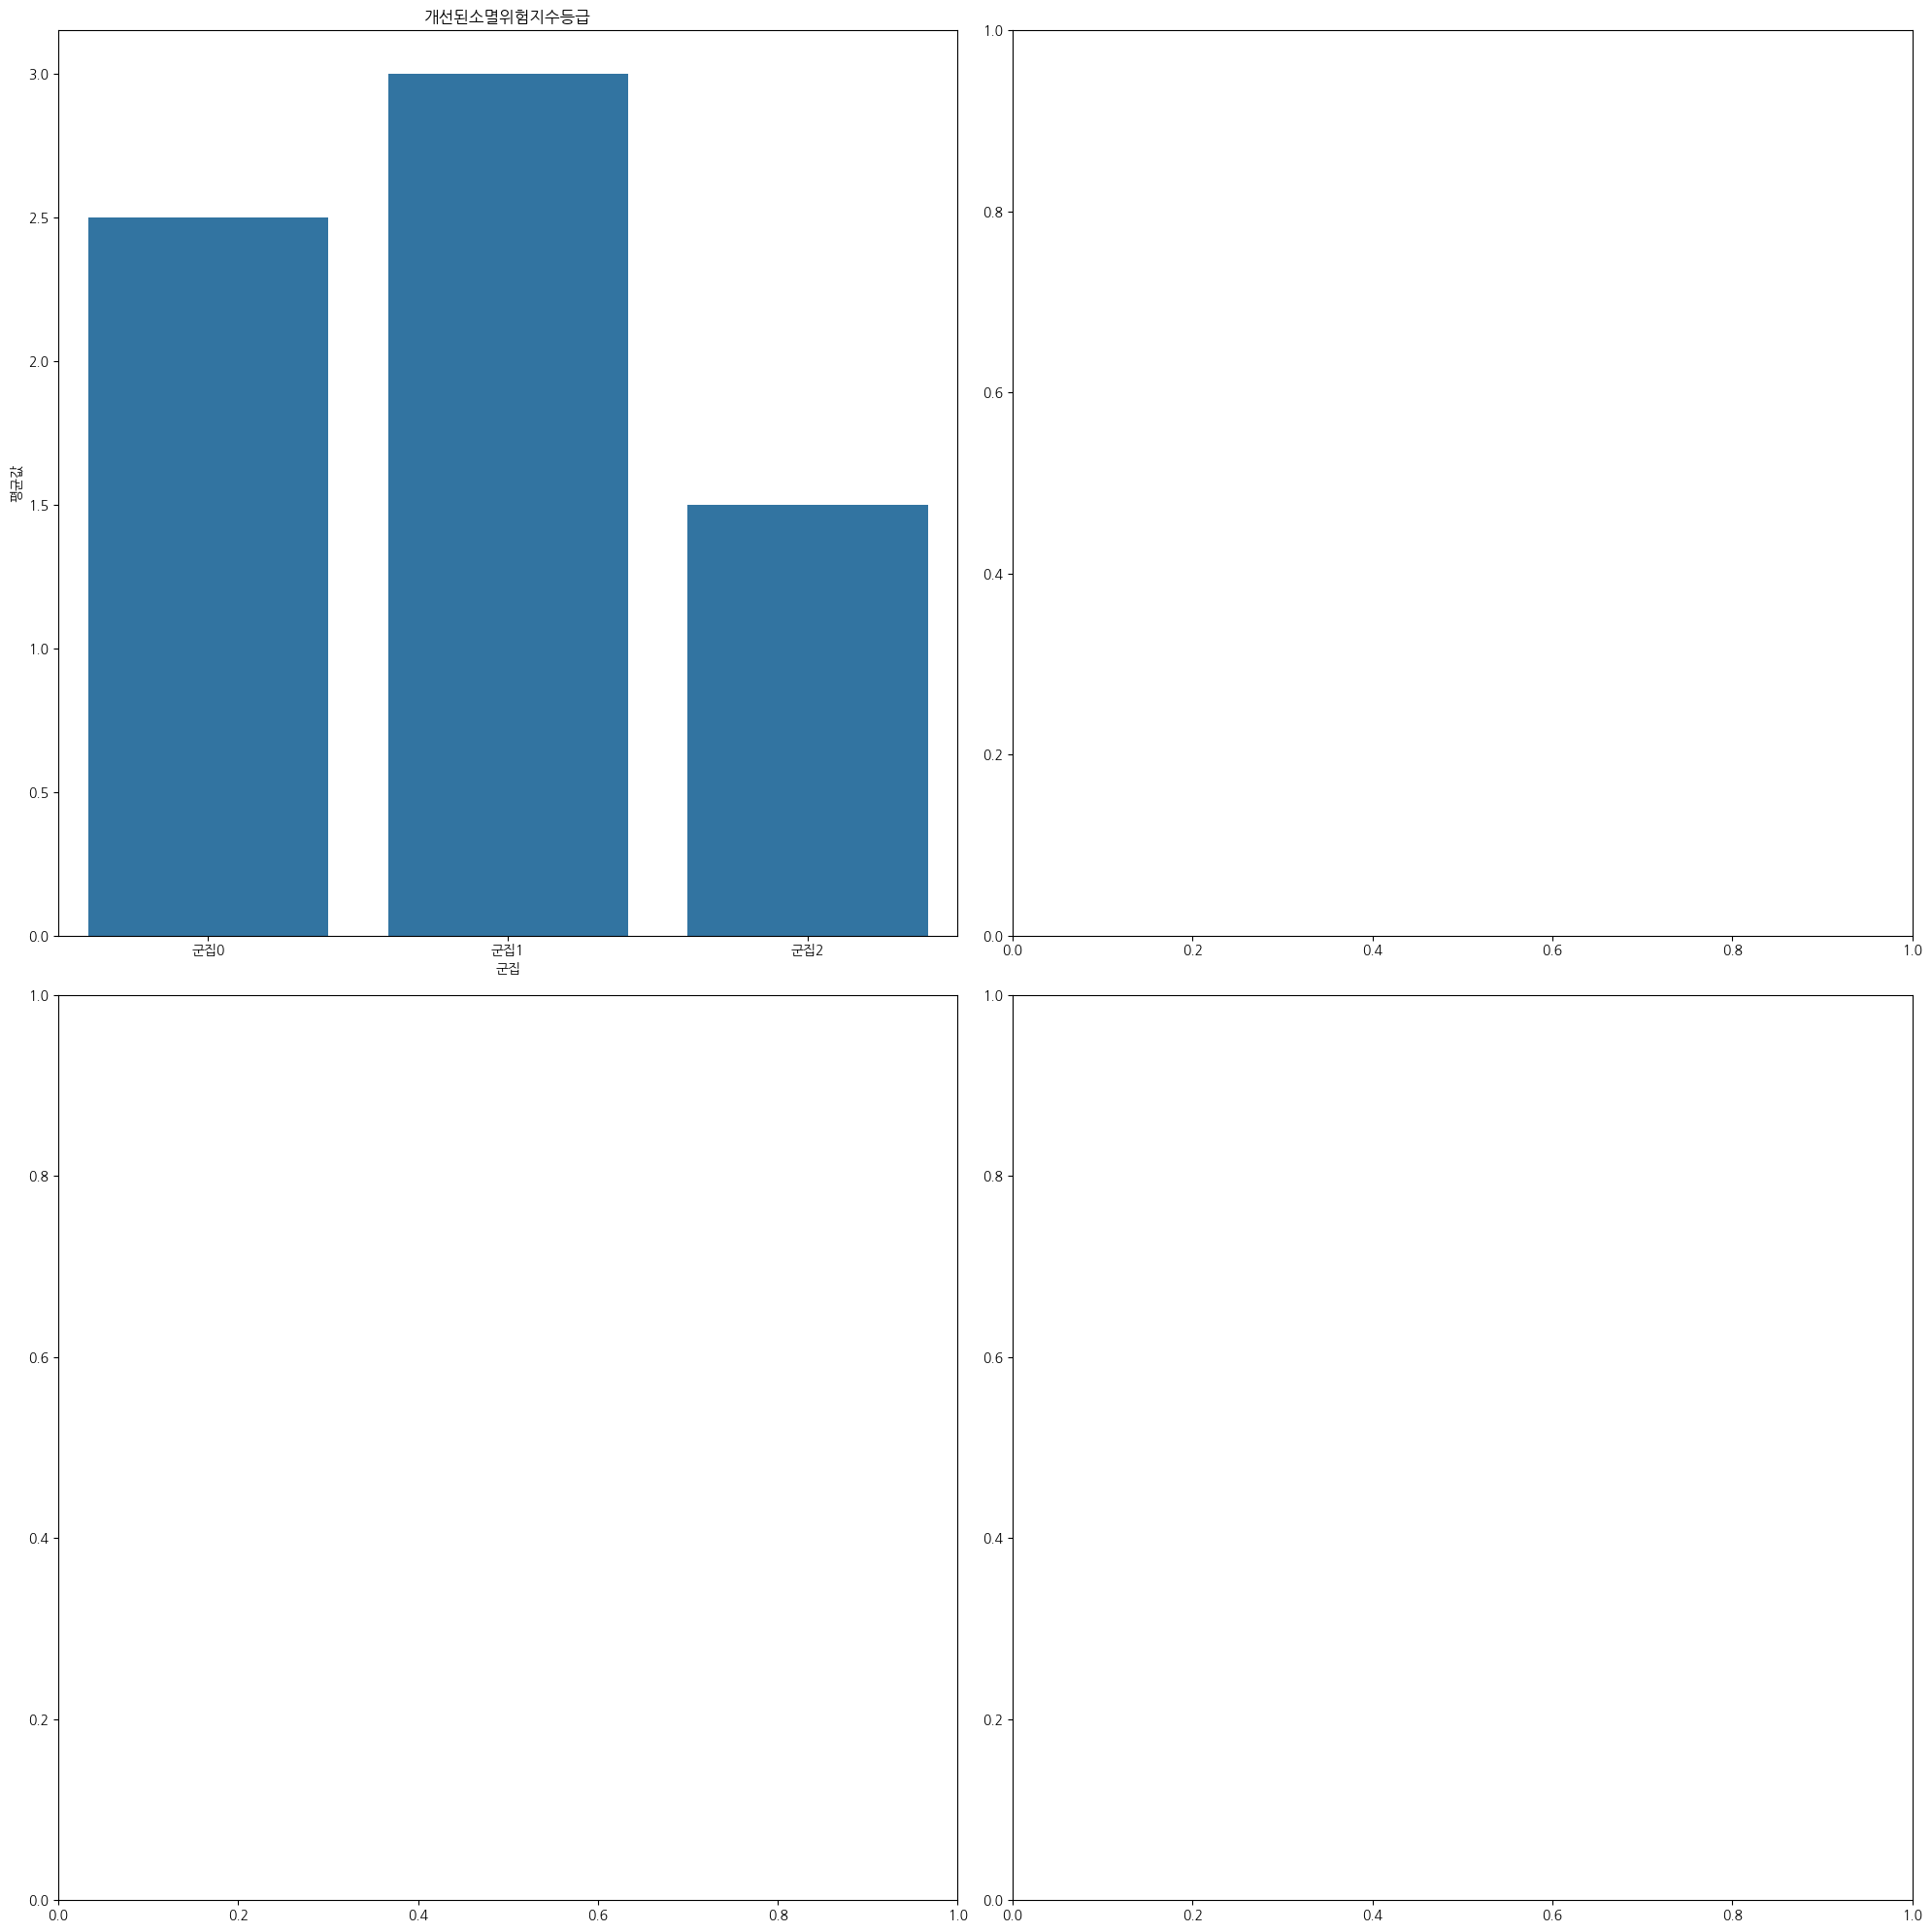

In [25]:
for m in cols:
    for i in range(0, len(m), 4):
        fig = plt.figure(figsize=(20, 20))
        axs = [fig.add_subplot(2, 2, j+1) for j in range(4)]

        for j, ax in enumerate(axs):
            if i + j < len(m):
                sns.barplot(x=sc_mean.index, y=sc_mean[m[i + j]], ax=ax)
                ax.set_title(m[i + j])
                ax.set_xlabel('군집')
                ax.set_ylabel('평균값')

        plt.tight_layout()
        plt.show()